# **01.020 Design Thinking Project III - Term 3** 
#### SC02 Group 1

Name | Student ID
:- | :-
Chua Min Pei  | 1005340 
Sim Yu Hui, Kellie | 1004204
Ryan Kaw Zheng Da | 1005144
Eunice Kwok Xiu Yi | 1005469
Ng Zhen An | 1005527 

# Task 1

Task 1: Build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

* Find data sets for the number of deaths in various countries (a minimum of 20 countries) due to COVID-19.
* Research for appropriate predictor variables to predict deaths due to COVID-19.
* You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
*  Find data sets on the chosen predictors for the various countries in the model.
* Use plots to visualize and understand your data.
* Build a model and test the accuracy of your model, using an appropriately chosen metric
(hint: r2 is not a good metric for this task).
* If needed, improve your model by incorporating other predictors, and/or removing existing ones.
*Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.


---


For Task 1, an implementation of your final multiple linear regression model in Excel; the Excel spreadsheet needs to be annotated and interactive (i.e. contains formulas, so that changing the data input results in different output).

## Introduction
For Task 1, we were tasked to build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

After some research, we decided to use the data from the site [Our World in Data](https://ourworldindata.org/coronavirus) since it updates information on a regular daily basis from various sources. It includes data that fall within the following metrics:

| Metrics                     | Source                                                    | Updated | Countries |
|-----------------------------|-----------------------------------------------------------|---------|-----------|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 218       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 139       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 38        |
| Confirmed cases             | JHU CSSE COVID-19 Data                                    | Daily   | 196        |
| Confirmed deaths            | JHU CSSE COVID-19 Data                                    | Daily   | 196       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 185        |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 186        |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 241       |

We will elaborate on the chosen predictor variables later in the report.

## Import Libraries

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Process Data

To pre-process the data, we utilised 
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb

In [413]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


In [414]:
# !git clone https://github.com/owid/covid-19-data

In [415]:
# Import dataset
# file_url = 'covid-19-data/public/data/owid-covid-data.csv'
file_url = 't3-2d-ddw/task-1/owid-covid-data-asof-181121.csv'
df = pd.read_csv(file_url)
df.reset_index(drop=True, inplace=True)

# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes 

Predictor Variables (X)

Variable (X) | Description | Metrics (from OWID)
-------------------|------------------ | ------------------
total_cases | Total confirmed cases of COVID-19 | Confirmed cases
people_vaccinated_per_hundred      | Total number of people who received at least one vaccine dose per 100 people in the total population | Vaccinations
icu_patients | Number of COVID-19 patients in intensive care units (ICUs) on a given day | Hospital & ICU 
stringency_index | Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response) | Policy responses
aged_65_older | Share of the population that is 65 years and older, most recent year available | Others
aged_70_older | Share of the population that is 70 years and older in 2015 | Others
median_age | Median age of the population, UN projection for 2020 | Others
population_density | PNumber of people divided by land area, measured in square kilometers, most recent year available | Others
cardiovasc_death_rate | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) | Others
diabetes_prevalence | Diabetes prevalence (% of population aged 20 to 79) in 2017 | Others


Predicted Variable (y)

Variable (y) | Description | Category
-------------------|------------------ | ------------------
total_deaths_per_million | Total deaths attributed to COVID-19 | Confirmed deaths

## Original

### Visualisation and Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


In [416]:
# Determine the correlation between total deaths and all other features
corrMatrix = df.corr()
pd.set_option('display.max_rows', None)
deaths_corr = pd.DataFrame(corrMatrix.loc[:, ['total_deaths_per_million']])
deaths_corr[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[1:]

,total_deaths_per_million
excess_mortality_cumulative_per_million,0.845685
total_cases_per_million,0.777060
excess_mortality_cumulative,0.654311
new_deaths_smoothed_per_million,0.448648
female_smokers,0.380225
excess_mortality_cumulative_absolute,0.374115
aged_70_older,0.366196
aged_65_older,0.365638
new_cases_smoothed_per_million,0.364672
median_age,0.358345


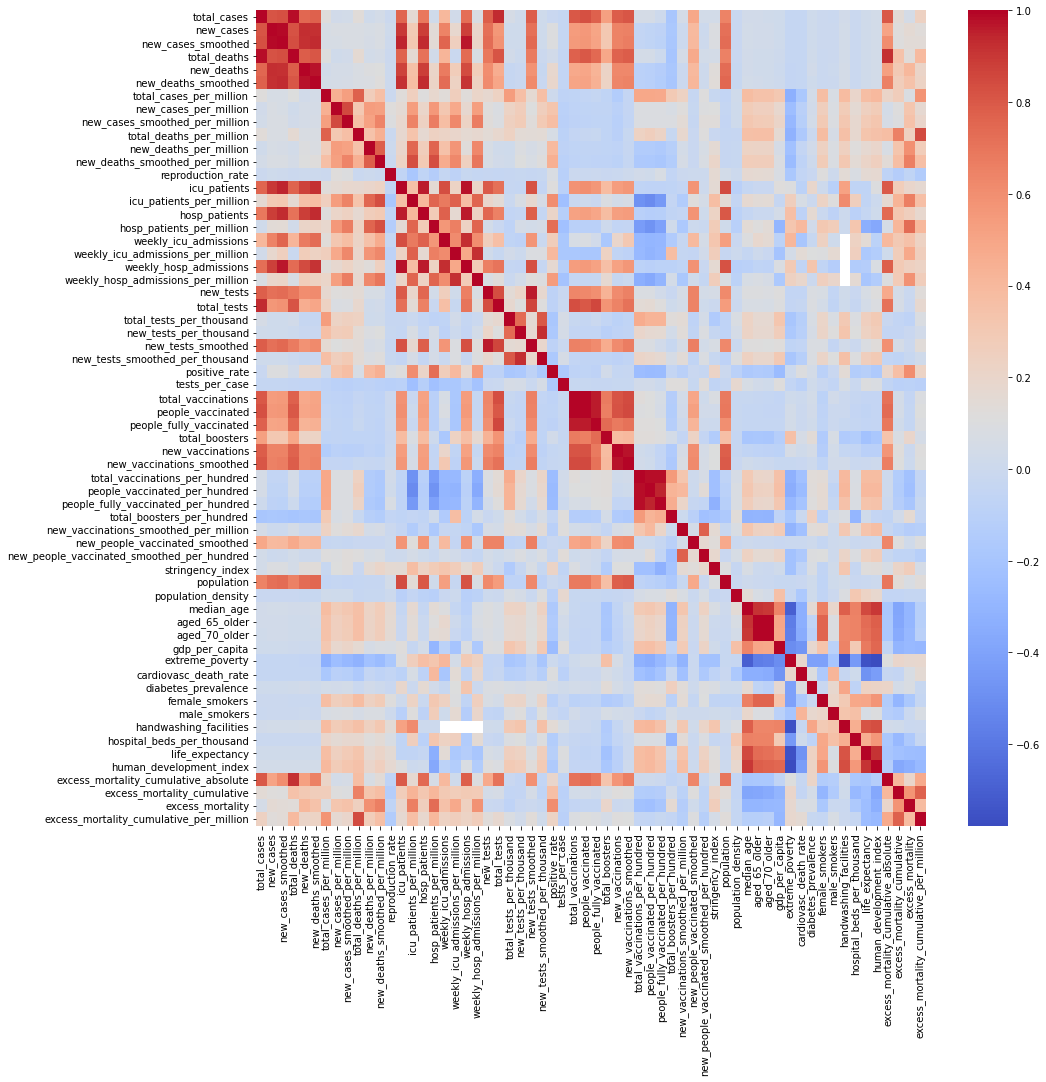

In [417]:
plt.figure(figsize = (15,15))
sns.heatmap(corrMatrix, cmap="coolwarm", annot=False)
plt.show()

In [418]:
# # Plot predictor variables against total deaths per million
# for row in deaths_corr.itertuples():
#   col_name = row.Index
#   plt.figure()
#   plt.xlabel(col_name)
#   plt.ylabel("total_deaths_per_million")
#   plt.title(col_name)
#   plt.scatter(df[col_name], df["total_deaths_per_million"])
#   plt.show()

In [419]:
features = ["total_cases_per_million", "people_vaccinated_per_hundred", "icu_patients", "stringency_index", "aged_65_older", "aged_70_older", "median_age", "population_density", "cardiovasc_death_rate", "diabetes_prevalence"]
target = ['total_deaths_per_million']
columns = features + target

df_features_target = df[columns]

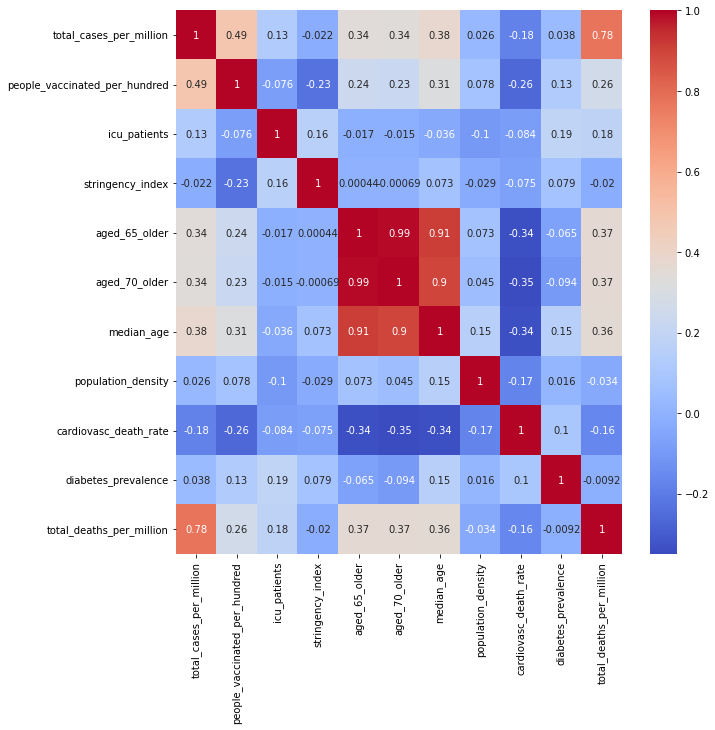

In [420]:
# Determine the correlation between total deaths and all other features
corrMatrix = df_features_target.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

### Multiple Linear Regression
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [421]:
def normalize_z(df):
  '''
  normalise z - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  dfout = (df - df.mean(axis=0)) / df.std(axis=0)
  return dfout

def normalize_minmax(df):
  '''
  normalise minmax - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
  return dfout

def transform_features(df_feature, colname, colname_transformed):
  # create a quadratic feature of x
  df_feature[colname_transformed] = df[colname].apply(lambda x: x**2)
  return df_feature

def get_features_targets(df, feature_names, target_names):
  '''
  get a pandas.DataFrame corresponding to the features and targets respectively
  :param df: pandas.DataFrame, full dataset
  :param feature_names: list, names of columns to be used as features
  :param target_names: list, names of columns to be used as targets
  return pandas.DataFrame, pandas.DataFrame
  '''
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector, 
  and add a column of '1's in the first column
  :param df_feature: pandas.DataFrame, values of features
  return numpy.array
  '''
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector
  :param df_feature: pandas.DataFrame, values of targets
  return numpy.array
  '''
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
    y_pred = np.matmul(X, beta)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # returns the indexes, which is the number of rows
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)

    # k = length / size of the test array
    k = int(test_size * len(indexes))

    test_index = np.random.choice(indexes, k, replace=False)
    train_index = list(set(indexes) - set(test_index))
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test

In [422]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [423]:
def r2_score(target, ypred):
  res = np.sum((target - ypred) ** 2)
  ymean = np.mean(y)
  tot = np.sum((target - ymean) ** 2)
  r2 = 1 - res/tot
  return r2

def ss_score(target, pred):
  # sum of square of residuals
  res = np.sum((pred - target) ** 2)
  # total sum of squares
  ymean = np.mean(target)
  tot = np.sum((target - ymean) ** 2)
  return res, tot

def mean_squared_error(target, pred):
  ysum = np.sum((target - pred) ** 2)
  n = target.shape[0]
  return ysum/n

def mean_absolute_error(target, pred):
  ysum = np.sum(abs(target - pred))
  n = target.shape[0]
  return ysum / n

def root_mean_squared_error(target, pred):
  ysum = np.sum((target - pred) ** 2)
  n = target.shape[0]
  return np.sqrt(ysum/n)

def mean_squared_log_error(target, pred):
  return np.mean((np.log(target + 1) - np.log(pred + 1)) ** 2)

# https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
def root_mean_squared_log_error(target, pred):
  return np.sqrt(mean_squared_log_error(target, pred))

In [424]:
def multiple_linear_regression(df_features, df_target, filename):
  # Normalize the features using z normalization
  df_features_z = normalize_z(df_features)

  # Split the data set into training and test
  df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

  # Saving to CSV file (for MU)
  df_task_1 = pd.concat([df_features_z, df_target], axis=1)
  df_task_1.to_csv(filename)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_z)
  target = prepare_target(df_target)

  iterations = 1500
  # alpha = 0.01
  alpha = 0.1
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # Plotting figures for visualisation
  plt.figure()
  plt.plot(J_storage)
  plt.figure()
  plt.scatter(df_features_test["total_cases_per_million"], np.array(df_target_test), color='blue')
  plt.scatter(df_features_test["total_cases_per_million"], pred, color='orange')
  plt.show()

  # Change target test set to a numpy array
  target = df_target_test.to_numpy()

  # Calculate SS, MSE, RMSE, MAE, MSLE, RMSLE
  print("SSᵣ (sum of the square of residuals): ", ss_score(target, pred)[0])
  print("SSₜ (total sum of errors if we take the mean of the observed values as the predicted value): ", ss_score(target, pred)[1])
  print("Mean Square Error: ", mean_squared_error(target, pred))
  print("Root Mean Squared Error: ", root_mean_squared_error(target, pred))
  print("Mean Absolute Error: ", mean_absolute_error(target, pred))
  print("Mean Squared Log Error: ", mean_squared_log_error(target, pred))
  print("Root Mean Squared Log Error: ", root_mean_squared_log_error(target, pred))

  return beta

In [425]:
null_data = df[df["total_deaths_per_million"].isna()]
print("Number of rows with NaN values in 'total_deaths_per_million' column:", null_data.shape[0])
null_countries = null_data['iso_code']

Number of rows with NaN values in 'total_deaths_per_million' column: 19170


In [426]:
df_features, df_target = get_features_targets(df.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,total_cases_per_million,people_vaccinated_per_hundred,icu_patients,stringency_index,aged_65_older,aged_70_older,median_age,population_density,cardiovasc_death_rate,diabetes_prevalence
count,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000
mean,73758.269761,38.049844,1330.232114,57.516023,17.912018,11.890547,41.665226,199.842763,159.476137,6.854173
std,34219.473729,27.128301,3656.607289,15.454970,3.532690,2.734393,4.246760,273.927270,79.082325,2.773895
min,2400.944000,0.000000,0.000000,19.440000,6.211000,3.407000,29.100000,4.037000,86.060000,3.280000
25%,48132.502500,9.610000,42.000000,46.300000,16.984000,10.797000,40.800000,69.874000,113.151000,4.770000
50%,70667.800000,40.770000,222.000000,56.940000,19.027000,12.527000,42.400000,122.578000,128.275000,6.410000
75%,96203.043500,63.385000,935.500000,69.440000,19.677000,13.433000,44.400000,231.447000,156.139000,8.310000
max,171248.887000,88.820000,28891.000000,87.960000,23.021000,16.240000,47.900000,1454.037000,424.688000,16.740000


,total_deaths_per_million
count,6919.000000
mean,1265.314425
std,665.626967
min,33.347000
25%,758.482500
50%,1188.202000
75%,1781.582000
max,3345.535000


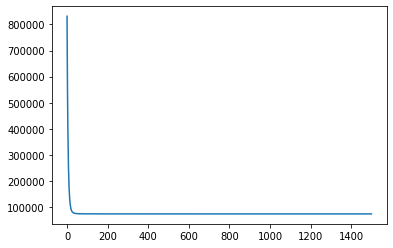

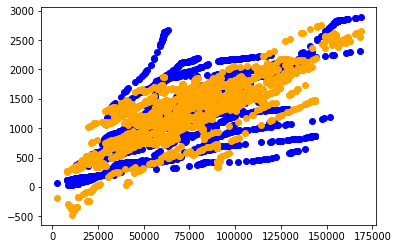

SSᵣ (sum of the square of residuals):  305546825.5681204
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  908316212.8510767
Mean Square Error:  147251.48220150382
Root Mean Squared Error:  383.7336083815227
Mean Absolute Error:  297.18425208134516
Mean Squared Log Error:  nan
Root Mean Squared Log Error:  nan
[[1265.31442521]
 [ 490.99166788]
 [  44.79309792]
 [  75.50543638]
 [ 158.2917181 ]
 [  -4.37244906]
 [  26.13483359]
 [ 235.05787219]
 [  -9.14596965]
 [ 181.27706542]
 [ -70.61582246]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log


In [427]:
# interpolation is done to eliminate the nan values
# df_features, df_target = get_features_targets(df_first_world_countries.interpolate(method='linear', axis=0, limit_direction='both'), features, target)
  
# multiple_linear_regression function returns the coefficients of linear regression
beta = multiple_linear_regression(df_features, df_target, 'df_task_1.csv')
print(beta)

In [391]:
# removing outliers using percentiles (https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [392]:
df_features, df_target = get_features_targets(df_outliers_removed.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,total_cases_per_million,people_vaccinated_per_hundred,icu_patients,stringency_index,aged_65_older,aged_70_older,median_age,population_density,cardiovasc_death_rate,diabetes_prevalence
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,16119.182667,21.657049,94.546448,54.633443,16.145060,10.008754,38.559563,53.589672,185.872235,8.965956
std,12812.783504,25.687360,96.413070,10.238193,6.940069,4.589989,6.132270,55.217053,55.661044,4.981136
min,2400.944000,0.000000,5.000000,38.430000,6.211000,3.407000,29.100000,17.348000,99.739000,5.590000
25%,9965.876000,1.800000,18.000000,48.380000,6.293000,3.407000,29.900000,18.136000,153.507000,5.760000
50%,11988.640000,7.290000,38.000000,52.310000,21.228000,13.264000,42.800000,18.136000,153.507000,5.760000
75%,17572.757000,40.270000,195.500000,60.190000,21.228000,13.264000,42.800000,96.254000,260.942000,16.740000
max,62733.564000,69.560000,345.000000,77.310000,21.228000,13.264000,43.100000,214.243000,278.364000,16.740000


,total_deaths_per_million
count,183.000000
mean,184.039557
std,255.561435
min,34.354000
25%,41.158000
50%,141.663000
75%,175.908000
max,1137.400000


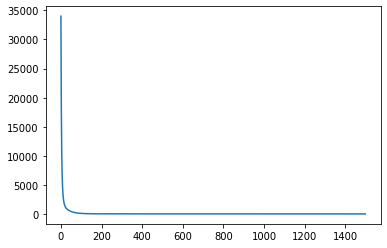

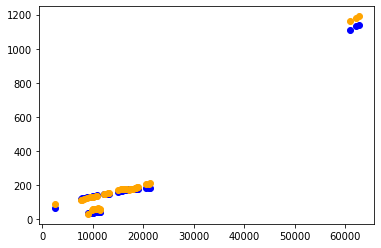

SSᵣ (sum of the square of residuals):  17295.69951980588
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  3065773.4643143704
Mean Square Error:  320.29073184825705
Root Mean Squared Error:  17.896668177296494
Mean Absolute Error:  12.942642085188348
Mean Squared Log Error:  0.04627134156459078
Root Mean Squared Log Error:  0.2151077440832635
[[ 184.03955738]
 [ 134.13816865]
 [ -23.24847913]
 [ -18.59894538]
 [  -3.36999569]
 [ -36.14785847]
 [ -10.95233899]
 [ -16.21334948]
 [ 124.4792248 ]
 [ -29.03313863]
 [-142.78254412]]


In [393]:
# interpolation is done to eliminate the nan values
# df_features, df_target = get_features_targets(df_first_world_countries.interpolate(method='linear', axis=0, limit_direction='both'), features, target)
  
# multiple_linear_regression function returns the coefficients of linear regression
beta = multiple_linear_regression(df_features, df_target, 'df_task_1_removed_outliers.csv')
print(beta)

## Improvement 1: First World Countries

Over the past 2 years, the COVID-19 pandemic to impact the Least Developed Countries (LDCs), Landlocked Developing Countries (LLDCs) and Small Island Developing States (SIDS) disproportionately with potentially devastating impacts on human health, including through social and economic effects of the virus and containment policies through the months and years to come. The lack of domestic financial resources, high debt levels and fragile health systems presents an urgent challenge. What has emerged as a health crisis in the short term may well have far reaching impacts on education, human rights, food security and economic development in the long term. 

The COVID-19 pandemic is also having a dramatic effect on global migration and tourism. Remittances comprise important revenue for most LDCs, LLDCs, and SIDS, which overall provides more funds than Official Development Assistance.

The United Nations noted that supporting these vulnerable country groups will need a three-pronged approach to:
1. Provide resources to stop the spread of COVID-19
2. Rapidly build capacity to curb the outbreak
3. Provision of resources to avoid economic collapse. Both financial and technical support will be necessary to limit the impact on the most vulnerable countries. 

A statement by the High Representative for the LDCs, LLDCs and SIDS, Fekitamoeloa Katoa ‘Utoikamanu, stresses that to avoid a truly devastating global tragedy, in the days, weeks and months ahead, it will be critical that the international community urgently support vulnerable countries to strengthen their health systems and their capacity to halt transmission. In an ever more interconnected world, we are only as strong as our weakest health system. 

Reference: https://www.un.org/ohrlls/news/world%E2%80%99s-most-vulnerable-countries-lack-capacity-respond-global-pandemic-credit-mfdelyas-alwazir

With that said, we decided to explore the possibility that some of these LDCs, LLDCs and SIDS had healthcare systems that were overwhelmed and hence unable to accurately log the true data as well as other more developed countries. As such, we decided to only use the data from the first world countries in our model. 

In [394]:
# https://worldpopulationreview.com/country-rankings/first-world-countries 
# according to this, first world countries usually have HDI above 0.8

df_first_world_countries = df[df['human_development_index'] >= 0.8]

unique_codes = list(df_first_world_countries['iso_code'].unique())

print("Number of First World Countries:", len(unique_codes))
print(unique_codes)

Number of First World Countries: 66
['AND', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR', 'BRB', 'BLR', 'BEL', 'BRN', 'BGR', 'CAN', 'CHL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'GEO', 'DEU', 'GRC', 'HKG', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KWT', 'LVA', 'LIE', 'LTU', 'LUX', 'MYS', 'MLT', 'MUS', 'MNE', 'NLD', 'NZL', 'NOR', 'OMN', 'PLW', 'PAN', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SAU', 'SRB', 'SGP', 'SVK', 'SVN', 'KOR', 'ESP', 'SWE', 'CHE', 'TUR', 'ARE', 'GBR', 'USA', 'URY']


### Visualisation and Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


In [395]:
# Determine the correlation between total deaths and all other features
corrMatrix = df_first_world_countries.corr()
pd.set_option('display.max_rows', None)
deaths_corr = pd.DataFrame(corrMatrix.loc[:, ['total_deaths_per_million']])
deaths_corr[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[1:]

,total_deaths,total_deaths_per_million
total_cases,0.980478,0.298330
new_cases,0.682328,0.166198
new_cases_smoothed,0.716370,0.175479
total_deaths,1.000000,0.337679
new_deaths,0.630235,0.149214
new_deaths_smoothed,0.677955,0.163419
total_cases_per_million,0.235194,0.818202
new_cases_per_million,0.066901,0.292919
new_cases_smoothed_per_million,0.078904,0.338467
total_deaths_per_million,0.337679,1.000000


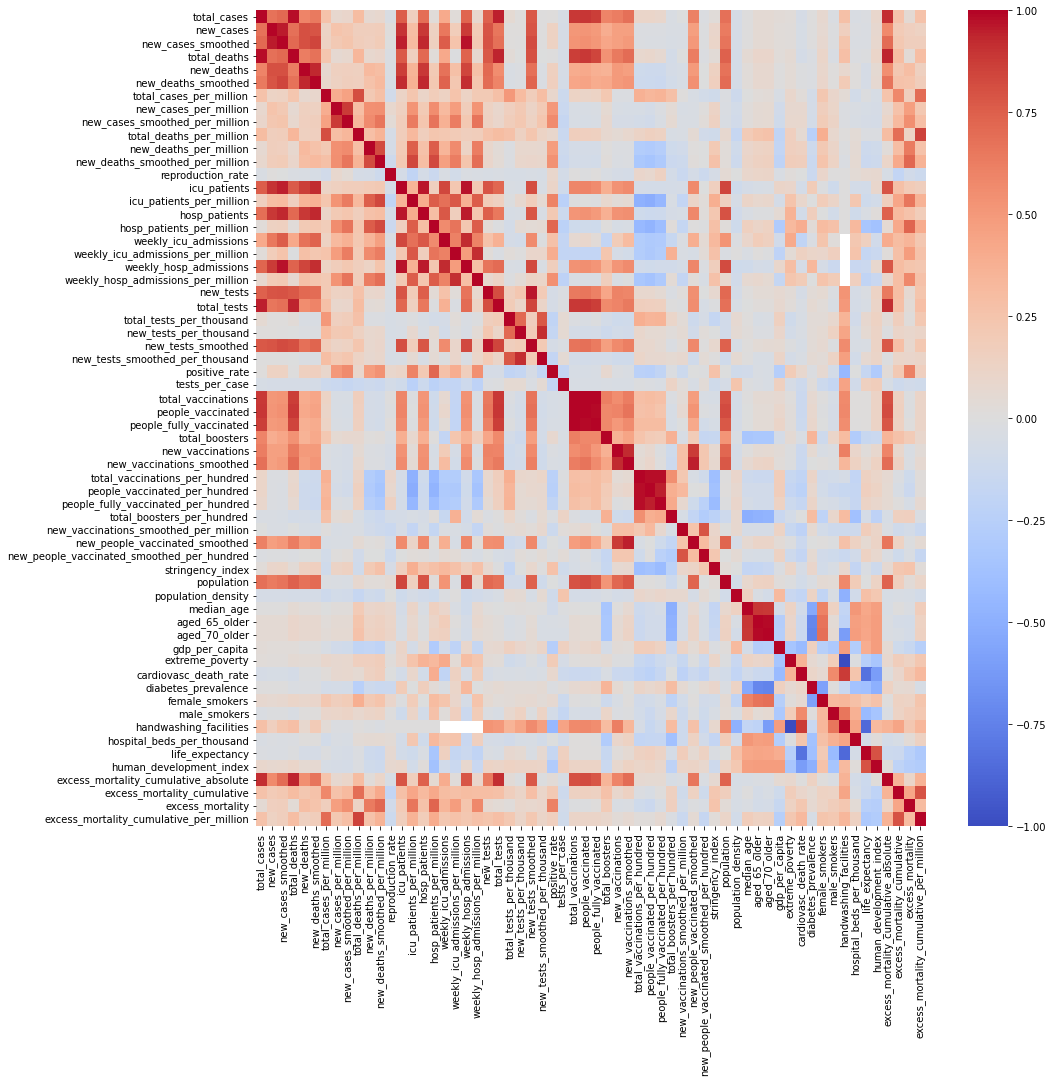

In [398]:
plt.figure(figsize = (15,15))
sns.heatmap(corrMatrix, cmap="coolwarm", annot=False)
plt.show()

In [400]:
# # Plot predictor variables against total deaths per million
# for row in deaths_corr.itertuples():
#   col_name = row.Index
#   plt.figure()
#   plt.xlabel(col_name)
#   plt.ylabel("total_deaths_per_million")
#   plt.title(col_name)
#   plt.scatter(df[col_name], df["total_deaths_per_million"])
#   plt.show()

In [401]:
features = ["total_cases_per_million", "people_vaccinated_per_hundred", "stringency_index", "aged_65_older", "aged_70_older", "median_age", "population_density", "cardiovasc_death_rate", "diabetes_prevalence", "icu_patients"]
target = ['total_deaths_per_million']
columns = features + target

df_features_target = df_first_world_countries[columns]

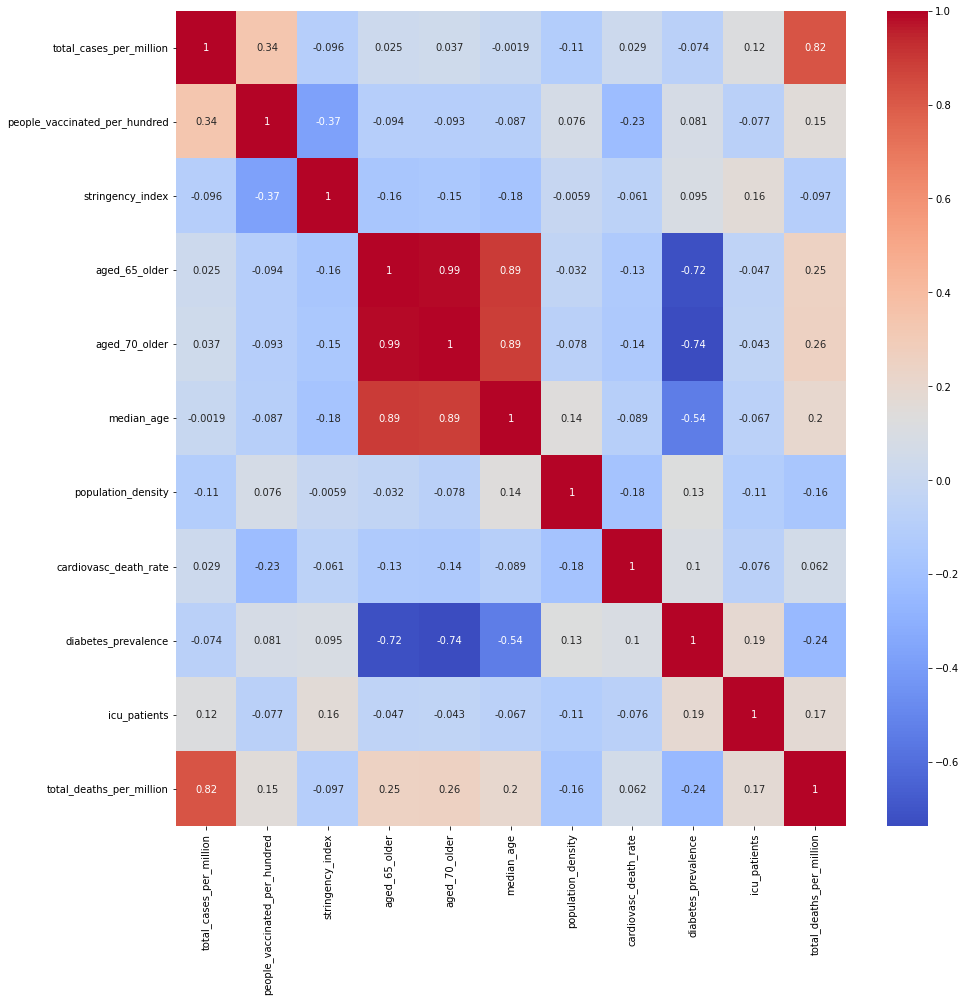

In [402]:
# Determine the correlation between total deaths and all other features
corrMatrix = df_features_target.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

### Multiple Linear Regression
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [403]:
# null_data = df_first_world_countries[df_first_world_countries["total_deaths_per_million"].isna()]

# null_values = 0
# for code in unique_codes:
#   null_value = null_data[null_data['iso_code'] == code]
#   null_values += null_value

# print("Number of rows with NaN values in 'total_deaths_per_million' column", code, null_value.shape[0])

In [404]:
# null_data = df[df.isna().any(axis=1)]
null_data = df_first_world_countries[df_first_world_countries["total_deaths_per_million"].isna()]
print("Number of rows with NaN values in 'total_deaths_per_million' column:", null_data.shape[0])
null_countries = null_data['iso_code']

Number of rows with NaN values in 'total_deaths_per_million' column: 1840


In [405]:
# # an attempt to only use the first 20 values with minimal nan values
# null_values = null_data['iso_code'].value_counts(ascending=True)
# null_values = null_data['iso_code'].value_counts(ascending=True).rename_axis('unique_values').to_frame('counts')
# df_task_1 = df_first_world_countries[df_first_world_countries['iso_code'].isin(list(null_values[0:20].index))]
# df_task_1.shape

In [406]:
df_features, df_target = get_features_targets(df_first_world_countries.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,total_cases_per_million,people_vaccinated_per_hundred,stringency_index,aged_65_older,aged_70_older,median_age,population_density,cardiovasc_death_rate,diabetes_prevalence,icu_patients
count,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000
mean,73849.056650,38.086631,57.522734,17.927258,11.901010,41.681592,200.080455,159.321290,6.854334,1331.933864
std,34149.076029,27.126050,15.457827,3.509640,2.720747,4.225226,274.026375,79.017245,2.775697,3658.683843
min,7708.943000,0.000000,19.440000,6.293000,3.407000,29.900000,4.037000,86.060000,3.280000,0.000000
25%,48198.461750,9.610000,46.300000,16.984000,10.797000,40.800000,69.874000,113.151000,4.770000,42.000000
50%,70727.068500,40.875000,56.940000,19.027000,12.527000,42.400000,122.578000,128.275000,6.410000,223.000000
75%,96261.859750,63.397500,69.440000,19.677000,13.433000,44.400000,231.447000,156.139000,8.310000,938.500000
max,171248.887000,88.820000,87.960000,23.021000,16.240000,47.900000,1454.037000,424.688000,16.740000,28891.000000


,total_deaths_per_million
count,6910.000000
mean,1266.815658
std,664.757609
min,33.347000
25%,760.807250
50%,1188.755000
75%,1782.224750
max,3345.535000


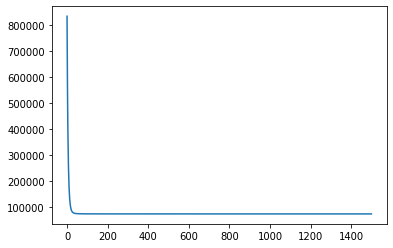

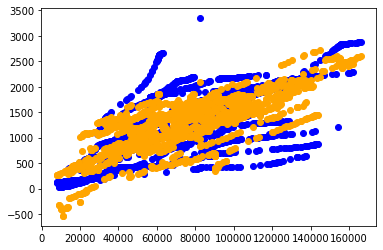

SSᵣ (sum of the square of residuals):  300008273.5790473
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  895080074.8472242
Mean Square Error:  144721.7914033031
Root Mean Squared Error:  380.4231741144368
Mean Absolute Error:  293.15760325169265
Mean Squared Log Error:  nan
Root Mean Squared Log Error:  nan
[[1266.81565832]
 [ 491.97576668]
 [  45.12460567]
 [ 159.65517393]
 [   2.98846074]
 [  21.94880496]
 [ 233.31252179]
 [  -9.56290367]
 [ 179.95457364]
 [ -68.76033497]
 [  74.98921228]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log


In [407]:
# interpolation is done to eliminate the nan values
# df_features, df_target = get_features_targets(df_first_world_countries.interpolate(method='linear', axis=0, limit_direction='both'), features, target)
  
# multiple_linear_regression function returns the coefficients of linear regression
beta = multiple_linear_regression(df_features, df_target, 'df_task_1_first_world.csv')
print(beta)

In [408]:
# removing outliers using percentiles (https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outliers_removed = df_outliers_removed[~((df_outliers_removed < (Q1 - 1.5 * IQR)) |(df_first_world_countries > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [409]:
df_features, df_target = get_features_targets(df_outliers_removed.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,total_cases_per_million,people_vaccinated_per_hundred,stringency_index,aged_65_older,aged_70_older,median_age,population_density,cardiovasc_death_rate,diabetes_prevalence,icu_patients
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,16119.182667,21.657049,54.633443,16.145060,10.008754,38.559563,53.589672,185.872235,8.965956,94.546448
std,12812.783504,25.687360,10.238193,6.940069,4.589989,6.132270,55.217053,55.661044,4.981136,96.413070
min,2400.944000,0.000000,38.430000,6.211000,3.407000,29.100000,17.348000,99.739000,5.590000,5.000000
25%,9965.876000,1.800000,48.380000,6.293000,3.407000,29.900000,18.136000,153.507000,5.760000,18.000000
50%,11988.640000,7.290000,52.310000,21.228000,13.264000,42.800000,18.136000,153.507000,5.760000,38.000000
75%,17572.757000,40.270000,60.190000,21.228000,13.264000,42.800000,96.254000,260.942000,16.740000,195.500000
max,62733.564000,69.560000,77.310000,21.228000,13.264000,43.100000,214.243000,278.364000,16.740000,345.000000


,total_deaths_per_million
count,183.000000
mean,184.039557
std,255.561435
min,34.354000
25%,41.158000
50%,141.663000
75%,175.908000
max,1137.400000


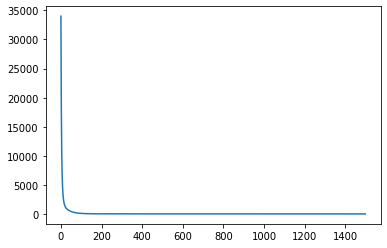

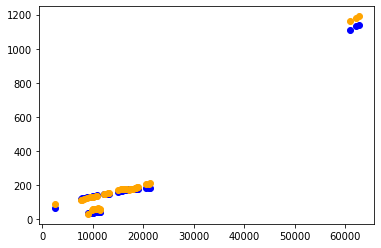

SSᵣ (sum of the square of residuals):  17295.69951980591
SSₜ (total sum of errors if we take the mean of the observed values as the predicted value):  3065773.4643143704
Mean Square Error:  320.29073184825756
Root Mean Squared Error:  17.896668177296508
Mean Absolute Error:  12.942642085188346
Mean Squared Log Error:  0.046271341564590694
Root Mean Squared Log Error:  0.2151077440832633
[[ 184.03955738]
 [ 134.13816865]
 [ -23.24847913]
 [  -3.36999569]
 [ -36.14785847]
 [ -10.95233899]
 [ -16.21334948]
 [ 124.4792248 ]
 [ -29.03313863]
 [-142.78254412]
 [ -18.59894538]]


In [410]:
# interpolation is done to eliminate the nan values
# df_features, df_target = get_features_targets(df_first_world_countries.interpolate(method='linear', axis=0, limit_direction='both'), features, target)
  
# multiple_linear_regression function returns the coefficients of linear regression
beta = multiple_linear_regression(df_features, df_target, 'df_task_1_first_world_removed_outliers.csv')
print(beta)

In [411]:
# # splitting by countries
# # countries - obtained from the excel. filtered out countries w/o vaccination, icu
# countries = ['NOR', 'USA', 'CAN', 'LVA', 'DNK', 'ISR', 'CHE', 'CHL', 'FRA', 'AUT', 'CZE', 'BEL', 'IRL', 'SVN', 'ITA', 'EST', 'BHR', 'DEU', 'LTU', 'SVK', 'GBR', 'GRC', 'IND', 'MLT', 'ARG', 'MEX', 'LUX', 'ECU', 'TUR', 'KHM', 'PER', 'ROU', 'NZL', 'KOR', 'AUS', 'POL', 'IDN', 'UKR', 'PRT', 'URY', 'MYS', 'BRB', 'FIN', 'LKA', 'BRA', 'GTM', 'ZWE', 'HRV', 'HUN', 'RUS', 'LBN', 'PAN', 'VNM', 'ESP', 'JPN', 'DOM', 'BGR', 'THA', 'AZE', 'MNG', 'TUN', 'TTO', 'PRY', 'KAZ', 'BGD', 'SUR', 'COL', 'ZAF', 'MAR', 'ETH', 'BOL', 'MWI', 'KEN', 'ALB', 'JOR', 'NPL', 'GEO', 'BRN', 'QAT', 'SLV', 'CYP', 'SGP', 'SAU', 'GIN', 'MDA', 'KGZ', 'ISL', 'ARE', 'BLZ', 'PAK', 'PHL', 'ZMB', 'BTN', 'LAO', 'OMN', 'JAM', 'UZB', 'SYC', 'UGA', 'GUY']

# # obtaining a new df which only contains those countries above
# df_new = df_copy[df_copy['iso_code'].isin(countries)]

# # run model on country-by-country-basis
# i = 0
# for country in countries:
#   i += 1
#   print(i, country)
#   df_features, df_target = get_features_targets(df_new[df_new['iso_code'] == country].dropna(axis=0), x_cols, y_cols)

#   # interpolation is done to eliminate the nan values
#   # df_features, df_target = get_features_targets(df_new[df_new['iso_code'] == country].interpolate(method='linear', axis=0, limit_direction='both'), x_cols, y_cols)
  
#   # multiple_linear_regression function returns the coefficients of linear regression
#   beta = multiple_linear_regression(df_features, df_target, country)
#   # final_beta = beta[-1]
#   print(beta)

# Task 2

Task 2: You are free to find and define a problem (apply the discovery and define phases first, from the UK Design Council Double Diamond, 3.007 Design Thinking and Innovation) of your interest related to COVID-19. The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression, which means you can work with either continuous numerical data or classification.
* Find an interesting problem which you want to solve either using Linear Regression or Classification (please check with your instructors first on whether the problem makes sense).
* Find a dataset to build your model. For example, you can use Kaggle
(https://www.kaggle.com/datasets) to find suitable datasets.
* Use plots to visualize and understand your data.
* Create training and test data sets.
* Build your model.
* Choose an appropriate metric to evaluate your model (you may use the same metric as the one used in Task 1).
* Improve your model.

Remote work has been a rising trend for several years, and the COVID-19 pandemic simply revealed the various opportunities and challenges of working from home for many companies globally.

With our personal experience of the different measures such as lockdowns and circuit breakers affecting our day-to-day life last year, we decided to predict how various policies would affect stay home requirements in several countries.

Locally, there has been a recent trend where there has been an increase in differentiated measures for vaccinated citizens. As such, we decided to incorporate vaccination policies as one of our predictor variables. We expect that increasing availability of vaccines can allow us to relax the stay home requirement policies. This is because with increasing availability of vaccines, more people are potentially able to get access to the vaccine and as a result, more people would be vaccinated. With more vaccinated people, we can be more assured that there will be lesser cases and transmission of the virus and society would also be able to progress towards herd immunity. Hence, with more vaccinations, it is possible to relax the stay home requirement policies.

Singapore has been implementing various ease-in and restrictive measures on the size of public gatherings in the past 2 years. If the maximum limit for gatherings is reduced, we expect there to be lesser group gatherings and close interactions. The restrictions may hinder people who would want to go out and socialize with their friends. As a result, this would lead to an increase in the number of people staying at home, giving an similar effect to stricter stay home requirement policies.

At the beginning of the spread of the virus, Singapore implemented that PCR testing for Covid-19 is to be carried out for Frontline workers. Over time, PCR testing eventually opened up for the general public. By increasing the accessibility of PCR testing to more people, we will be able to test more people and identify more positive cases. With more positive cases being identified, we can expect that there would be a tendency to want to isolate these cases from further spreading the virus and hence resulting in stricter stay home requirement policies.

Although there might be debates over mask wearing around the globe, Singapore has mostly adopted a very strong stand with regards to mask wearing. In Singapore, mask wearing is often compulsory when one is out of their home. If more people wear their masks, we can expect the transmission rates of the virus to be reduced due to lesser droplet passed during interactions. As lesser droplets are passed during interactions, there could be some relaxation when it comes to people gathering and hence stay home requirement policies can be relaxed.

As such, we decided to use these variables on a global scale, to see if it would affect other countries as it did Singapore.

Predictor Variables (X)

Variable (X) | Description | Grouped By
-------------------|------------------ | ------------------
testing_policy | Government policies on PCR testing for COVID-19 | No testing policy, Testing only for those who both (a) have symptoms AND (b) meet specific criteria (e.g. key workers, admitted to hospital, came into contact with a known case, returned from overseas), Testing of anyone showing COVID-19 symptoms, Open public testing (e.g “drive through” testing available to asymptomatic people)
facial_coverings | Government policies on the use of face coverings outside-of-the-home | No policy, Recommended, Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible, Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible, Required outside the home at all times regardless of location or presence of other people

Dataset Source: **insert link here**

## Import Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [76]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


In [77]:
countries = ['ALB', 'DZA', 'AND', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BDI', 'KHM', 'CAN', 'CPV', 'TCD', 'CHN', 'COL',
       'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'FRO', 'FIN', 'FRA',
       'GAB', 'GEO', 'DEU', 'GRC', 'GRL', 'GUM', 'GTM', 'GUY', 'HTI',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'KAZ', 'KEN', 'KIR', 'KGZ', 'LAO', 'LVA', 'LBN', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MLT', 'MRT', 'MUS',
       'MEX', 'MCO', 'MNG', 'MAR', 'MOZ', 'NLD', 'NGA', 'NOR', 'PNG',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SMR', 'SAU', 'SRB', 'SLE',
       'SGP', 'SLB', 'SOM', 'ZAF', 'KOR', 'ESP', 'SWE', 'CHE', 'TZA',
       'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ZMB',
       'ZWE']

In [78]:
df_cases = df.loc[df['iso_code'].isin(countries)]

In [79]:
# Import dataset
file_url = 't3-2d-ddw/task-2/merged/combined-x-cols.csv'
df_task_2 = pd.read_csv(file_url)

# # converting location to categories
# df_task_2['location'] = df_task_2['location'].astype('category')
# df_task_2['location'] = df_task_2['location'].cat.codes 

## Pre-Process Data

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb

Predictor Variables (X)

Variable (X) | Description | Grouped By
-------------------|------------------ | ------------------
testing_policy | Government policies on PCR testing for COVID-19 | No testing policy, Testing only for those who both (a) have symptoms AND (b) meet specific criteria (e.g. key workers, admitted to hospital, came into contact with a known case, returned from overseas), Testing of anyone showing COVID-19 symptoms, Open public testing (e.g “drive through” testing available to asymptomatic people)
vaccination_policy | Policies on the availability of vaccinations | No availability, Availability for ONE of following: key workers/ clinically vulnerable groups/elderly groups, Availability for TWO of following: key workers/clinically vulnerable groups/elderly groups, Availability for ALL of following: key workers/clinically vulnerable groups/elderly groups, Availability for all three plus partial additional availability (select broad groups/ages), Universal availability
facial_coverings | Government policies on the use of face coverings outside-of-the-home | No policy, Recommended, Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible, Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible, Required outside the home at all times regardless of location or presence of other people
restriction_gatherings | Government policies on restrictions on public gatherings | No restrictions, Restrictions on very large gatherings (the limit is above 1000 people), Restrictions on gatherings between 100 to 1000 people,Restrictions on gatherings between 10 to 100 people, Restrictions on gatherings of less than 10 people

Predicted Variable (y)

Variable (y) | Description | Category
-------------------|------------------ | ------------------
stay_home_requirements | Government policies on stay-at-home requirements or household lockdowns | No measures, Recommended not to leave the house, Required to not leave the house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips, Required to not leave the house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)

In [80]:
def normalize_z(df):
  '''
  normalise z - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  dfout = (df - df.mean(axis=0)) / df.std(axis=0)
  return dfout

def normalize_minmax(df):
  '''
  normalise minmax - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  dfout = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
  return dfout

def transform_features(df_feature, colname, colname_transformed):
  # create a quadratic feature of x
  df_feature[colname_transformed] = df[colname].apply(lambda x: x**2)
  return df_feature

def get_features_targets(df, feature_names, target_names):
  '''
  get a pandas.DataFrame corresponding to the features and targets respectively
  :param df: pandas.DataFrame, full dataset
  :param feature_names: list, names of columns to be used as features
  :param target_names: list, names of columns to be used as targets
  return pandas.DataFrame, pandas.DataFrame
  '''
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector, 
  and add a column of '1's in the first column
  :param df_feature: pandas.DataFrame, values of features
  return numpy.array
  '''
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector
  :param df_feature: pandas.DataFrame, values of targets
  return numpy.array
  '''
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
    y_pred = np.matmul(X, beta)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # returns the indexes, which is the number of rows
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)

    # k = length / size of the test array
    k = int(test_size * len(indexes))

    test_index = np.random.choice(indexes, k, replace=False)
    train_index = list(set(indexes) - set(test_index))
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test

In [89]:
# Extract features and targets
features = ['testing_policy', 'vaccination_policy','facial_coverings', 'restriction_gatherings']
target = ['stay_home_requirements']
columns = features + target

df_features, df_target = get_features_targets(df_task_2.loc[:, columns].dropna(axis=0), features, target)

display(df_features.describe())
display(df_target.describe())

,testing_policy,vaccination_policy,facial_coverings,restriction_gatherings
count,79345.000000,79345.000000,79345.000000,79345.000000
mean,1.925175,1.420657,2.223404,2.692999
std,0.984470,1.934039,1.350754,1.512546
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000
50%,2.000000,0.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,4.000000
max,3.000000,5.000000,4.000000,4.000000


,stay_home_requirements
count,79345.000000
mean,0.983805
std,0.908360
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


# Stay Home Requirements

### Visualisation and Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


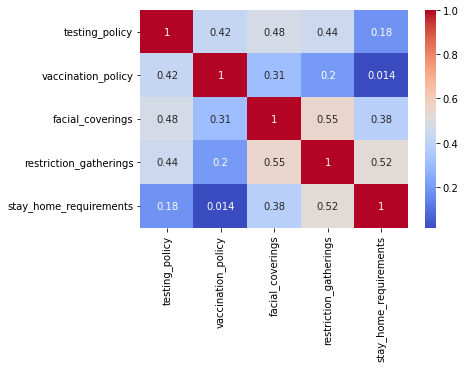

,stay_home_requirements
testing_policy,0.178311
vaccination_policy,0.014180
facial_coverings,0.380884
restriction_gatherings,0.524673
stay_home_requirements,1.000000


In [90]:
# Determine the correlation between total ICU cases and all other features
corrMatrix = df_task_2.corr()
pd.set_option('display.max_rows', None)
cases_corr = pd.DataFrame(corrMatrix['stay_home_requirements'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr

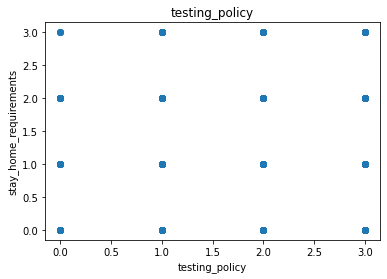

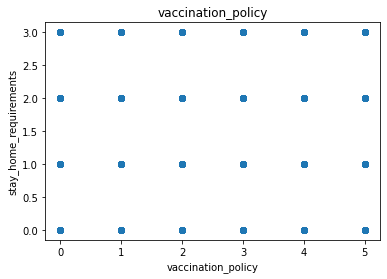

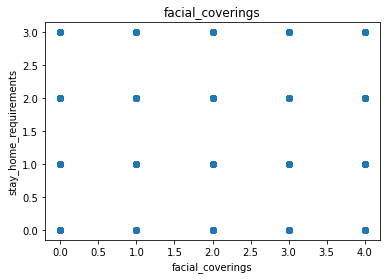

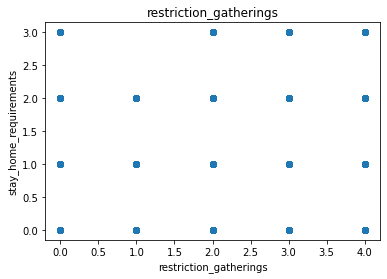

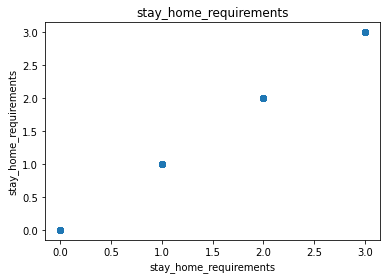

In [91]:
# Plot predictor variables against stay home requirements 
for row in cases_corr.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("stay_home_requirements")
  plt.title(col_name)
  plt.scatter(df_task_2[col_name], df_task_2["stay_home_requirements"])
  plt.show()

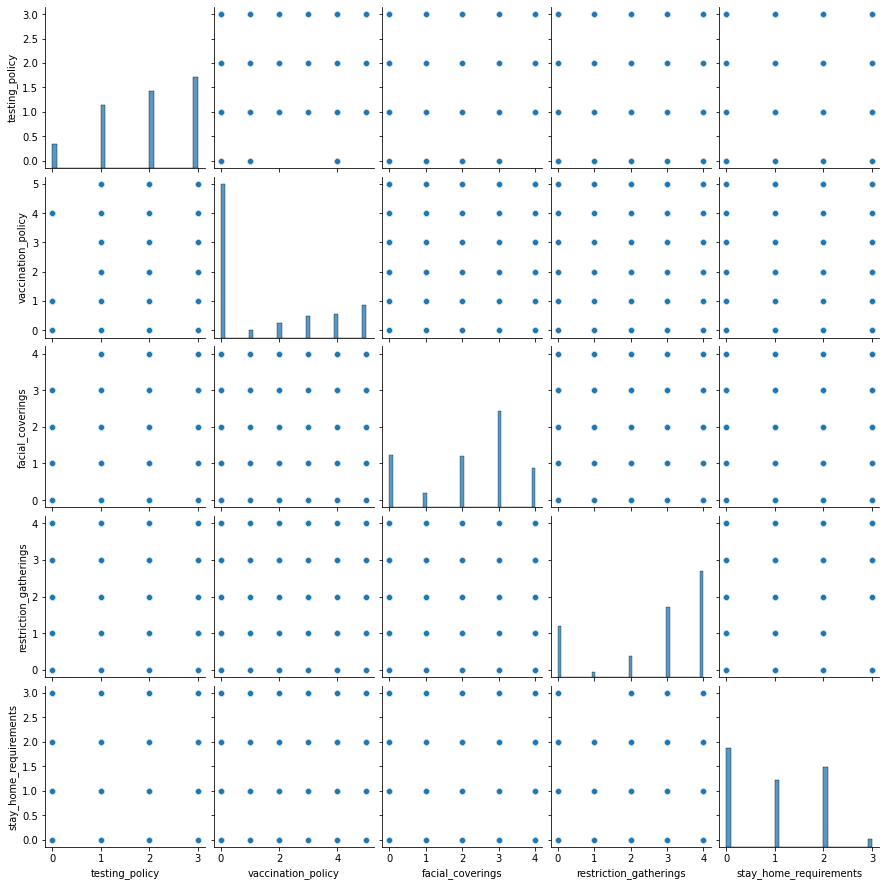

In [92]:
sns.pairplot(data=df_task_2)

## Multiple Linear Regression (Stay Home Requirements)
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [93]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [100]:
def multiple_linear_regression(df_features, df_target):
  # Split the data set into training and test
  df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=None, test_size=0.3)

  # Normalize the features using z normalization
  df_features_z = normalize_z(df_features)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_z)
  target = prepare_target(df_target)

  iterations = 1500
  alpha = 0.01
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # Plotting figures for visualisation
  plt.figure()
  plt.plot(J_storage)
  plt.figure()
  plt.scatter(df_features_test["restriction_gatherings"], np.array(df_target_test), color='blue')
  plt.scatter(df_features_test["restriction_gatherings"], pred, color='orange')
  plt.show()

  # Change target test set to a numpy array
  target = df_target_test.to_numpy()

  # Calculate MSE, RMSE, MAE, MSLE, RMSLE
  print("Mean Square Error: ", mean_squared_error(target, pred))
  print("Root Mean Squared Error: ", root_mean_squared_error(target, pred))
  print("Mean Absolute Error: ", mean_absolute_error(target, pred))
  print("Mean Squared Log Error: ", mean_squared_log_error(target, pred))
  print("Root Mean Squared Log Error: ", root_mean_squared_log_error(target, pred))

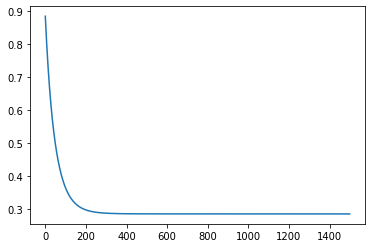

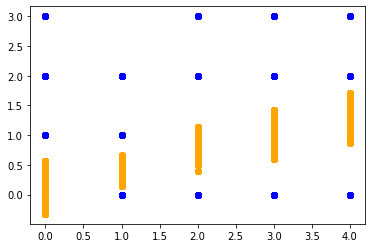

Mean Square Error:  0.5684595857417936
Root Mean Squared Error:  0.7539625890863508
Mean Absolute Error:  0.6090002867852327
Mean Squared Log Error:  0.166631629167978
Root Mean Squared Log Error:  0.40820537621150704


In [101]:
multiple_linear_regression(df_features, df_target)

In [ ]:
df_task_2_na = df_task_2.copy()
df_task_2_na.dropna(inplace=True)
df_task_2_ip = df_task_2.copy()
df_task_2_ip.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

df_features_na, df_target_na = get_features_targets(df_task_2_na, features, target)
df_features_ip, df_target_ip = get_features_targets(df_task_2_ip, features, target)

# Determine the correlation between total ICU cases and all other features
corrMatrix = df_task_2_na.corr()
pd.set_option('display.max_rows', None)
cases_corr_na = pd.DataFrame(corrMatrix['stay_home_requirements'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_na
# Plot predictor variables against stay home requirements 
for row in cases_corr_na.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("stay_home_requirements")
  plt.title(col_name)
  plt.scatter(df_task_2_na[col_name], df_task_2_na["stay_home_requirements"])
  plt.show()

# Determine the correlation between total ICU cases and all other features
corrMatrix = df_task_2_ip.corr()
pd.set_option('display.max_rows', None)
cases_corr_ip = pd.DataFrame(corrMatrix['stay_home_requirements'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

# Plot predictor variables against stay home requirements 
for row in cases_corr_ip.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("stay_home_requirements")
  plt.title(col_name)
  plt.scatter(df_task_2_ip[col_name], df_task_2_ip["stay_home_requirements"])
  plt.show()

print("drop na")
multiple_linear_regression(df_features_na, df_target_na)

print("interpolate")
multiple_linear_regression(df_features_ip, df_target_ip)

## Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


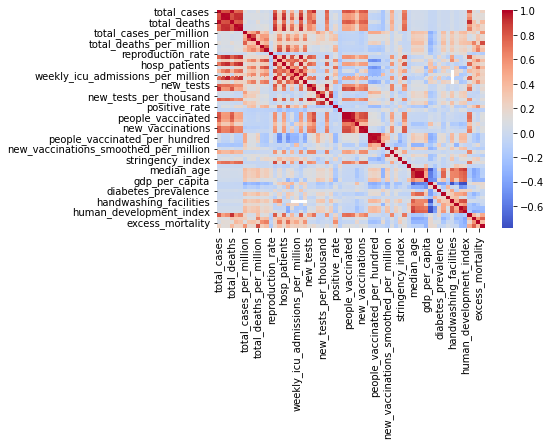

,total_cases_per_million
total_cases,0.119385
new_cases,0.063114
new_cases_smoothed,0.064010
total_deaths,0.107377
new_deaths,0.033339
new_deaths_smoothed,0.044819
total_cases_per_million,1.000000
new_cases_per_million,0.447575
new_cases_smoothed_per_million,0.533487
total_deaths_per_million,0.777060


In [ ]:
# Determine the correlation between total cases and all other features in main df
corrMatrix = df.corr()
pd.set_option('display.max_rows', None)
cases_corr = pd.DataFrame(corrMatrix['total_cases_per_million_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=False)
plt.show()

cases_corr

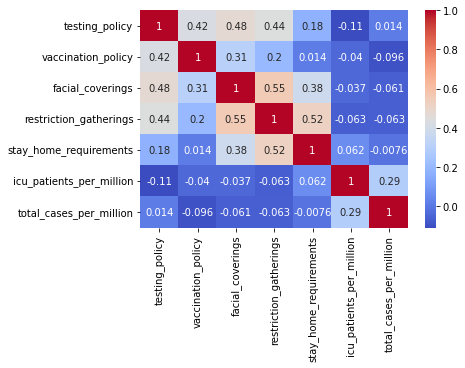

,total_cases_per_million
testing_policy,0.013655
vaccination_policy,-0.095637
facial_coverings,-0.060861
restriction_gatherings,-0.063030
stay_home_requirements,-0.007591
icu_patients_per_million,0.289513
total_cases_per_million,1.000000


In [ ]:
# Determine the correlation between total cases and all other features
corrMatrix = df_task_2.corr()
pd.set_option('display.max_rows', None)
cases_corr = pd.DataFrame(corrMatrix['total_cases_per_million_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr

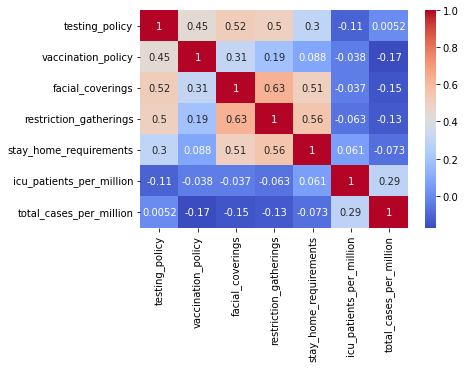

,total_cases_per_million
testing_policy,0.005177
vaccination_policy,-0.172725
facial_coverings,-0.146843
restriction_gatherings,-0.131933
stay_home_requirements,-0.072734
icu_patients_per_million,0.289513
total_cases_per_million,1.000000


In [ ]:
# Determine the correlation between total cases and all other features
corrMatrix = df_task_2_na.corr()
pd.set_option('display.max_rows', None)
cases_corr_na = pd.DataFrame(corrMatrix['total_cases_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_na

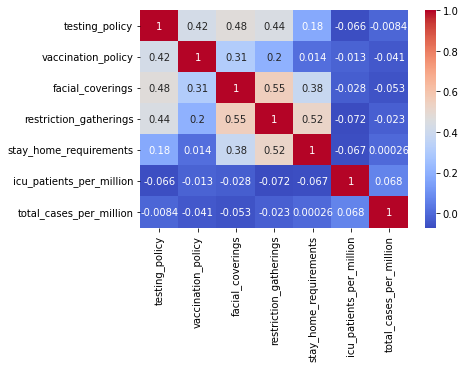

,total_cases_per_million
testing_policy,-0.008442
vaccination_policy,-0.041028
facial_coverings,-0.053130
restriction_gatherings,-0.022685
stay_home_requirements,0.000261
icu_patients_per_million,0.067573
total_cases_per_million,1.000000


In [ ]:
# Determine the correlation between total cases and all other features
corrMatrix = df_task_2_ip.corr()
pd.set_option('display.max_rows', None)
cases_corr_ip = pd.DataFrame(corrMatrix['total_cases_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_ip

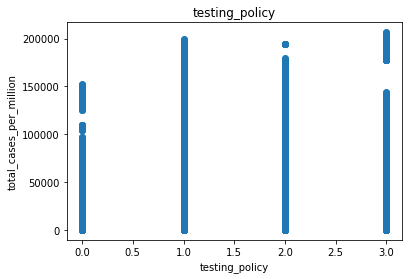

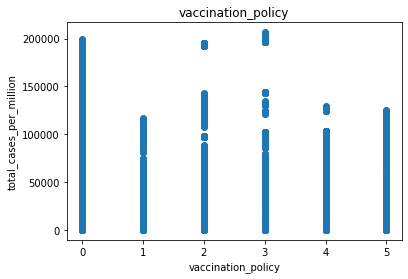

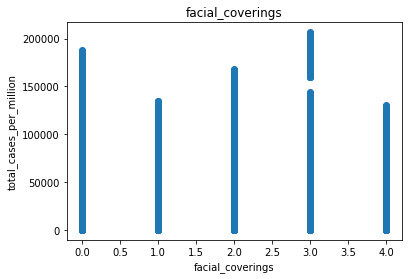

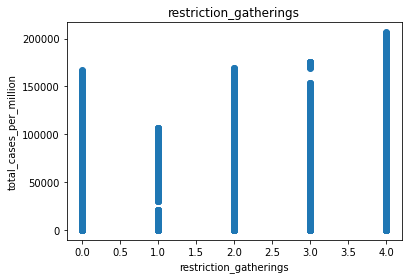

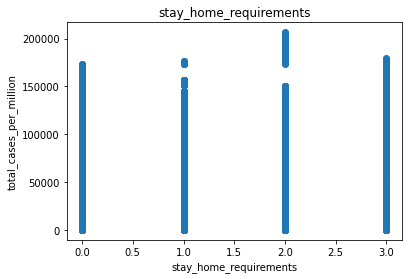

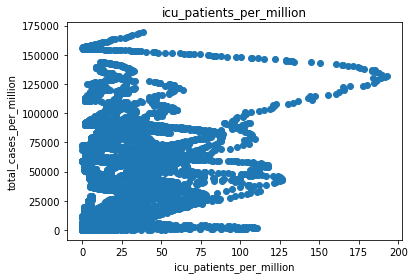

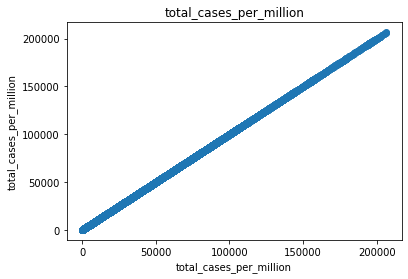

In [ ]:
# Plot predictor variables against total cases
for row in cases_corr.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_cases_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2[col_name], df_task_2["total_cases_per_million"])
  plt.show()

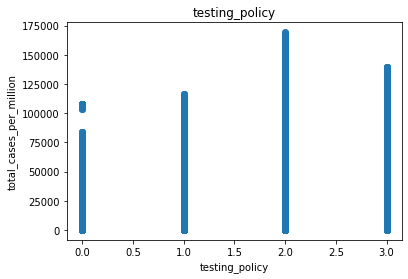

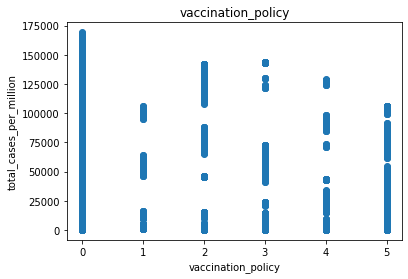

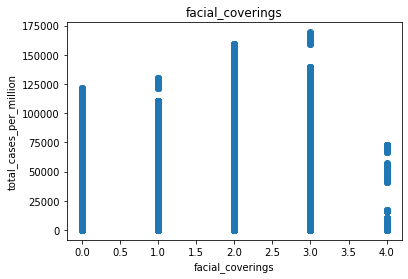

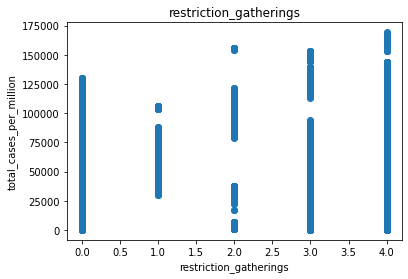

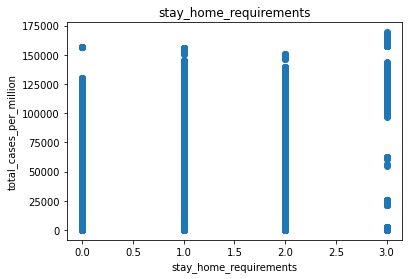

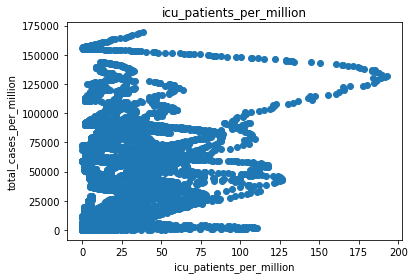

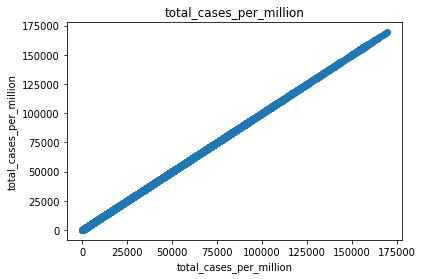

In [ ]:
# Plot predictor variables against total cases
for row in cases_corr_na.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_cases_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2_na[col_name], df_task_2_na["total_cases_per_million"])
  plt.show()

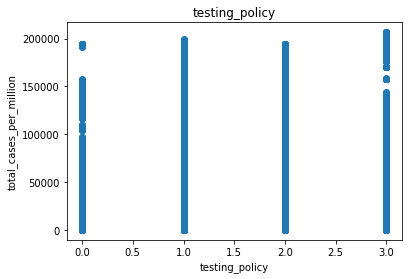

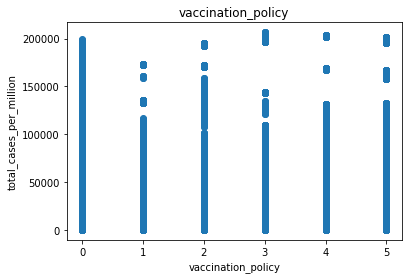

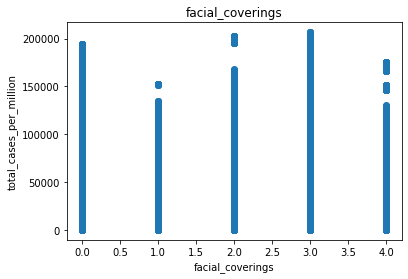

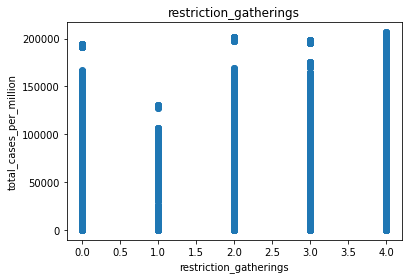

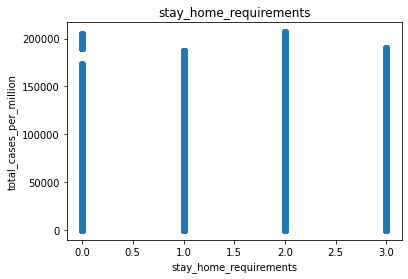

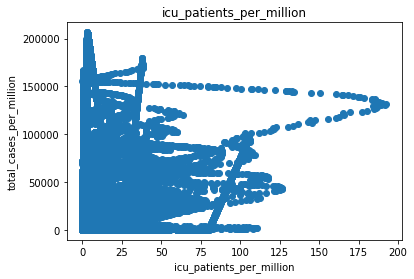

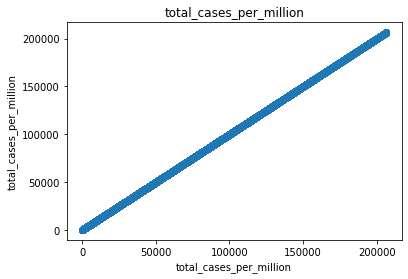

In [ ]:
# Plot predictor variables against total cases
for row in cases_corr_ip.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("total_cases_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2_ip[col_name], df_task_2_ip["total_cases_per_million"])
  plt.show()

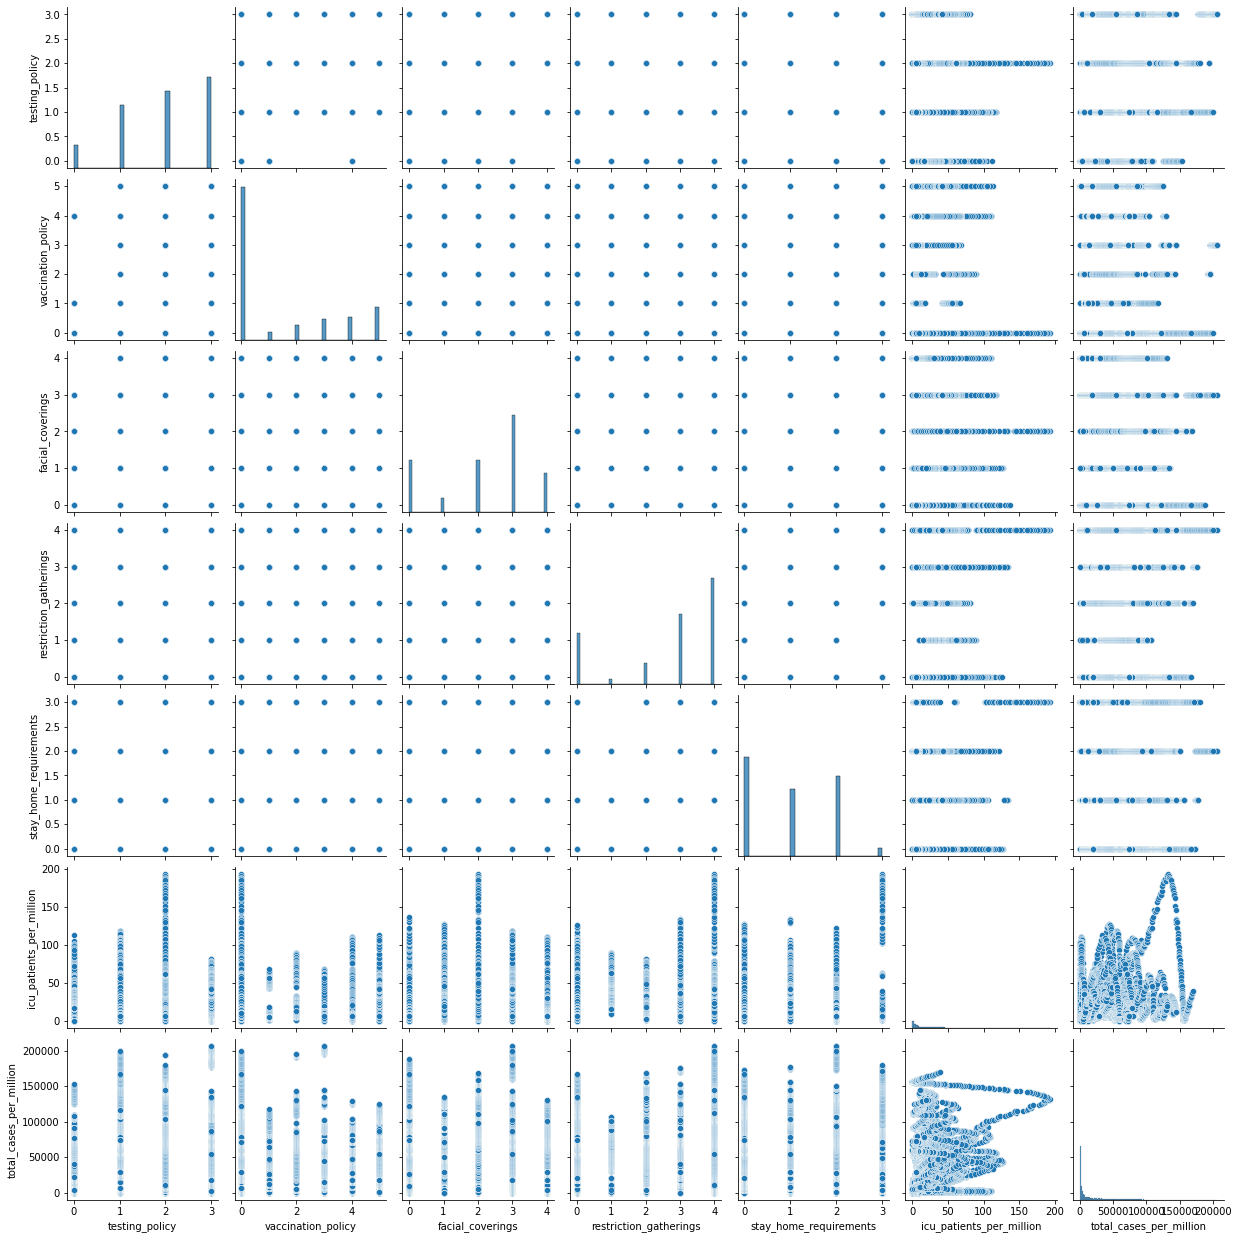

In [ ]:
sns.pairplot(data=df_task_2)

## Multiple Linear Regression (Total Cases)
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [ ]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [ ]:
def multiple_linear_regression(df_features, df_target):
  # Split the data set into training and test
  df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=None, test_size=0.3)

  # Normalize the features using z normalization
  df_features_z = normalize_z(df_features)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_z)
  target = prepare_target(df_target)

  iterations = 1500
  alpha = 0.01
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # Plotting figures for visualisation
  plt.figure()
  plt.plot(J_storage)
  plt.figure()
  plt.scatter(df_features_test["facial_coverings"], np.array(df_target_test), color='blue')
  plt.scatter(df_features_test["facial_coverings"], pred, color='orange')
  plt.show()

  # Calculate r^2
  # change target test set to a numpy array
  target = df_target_test.to_numpy()
  # Calculate r2 score by calling a function
  r2 = r2_score(target, pred)
  print("r2: ", r2)

  # Calculate MSE
  mse = mean_squared_error(target, pred)
  print("mse: ", mse)

normal


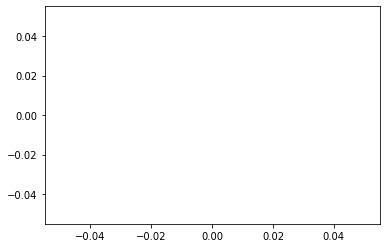

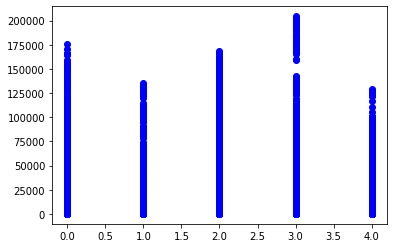

nan
r2:  nan
mse:  nan
drop na


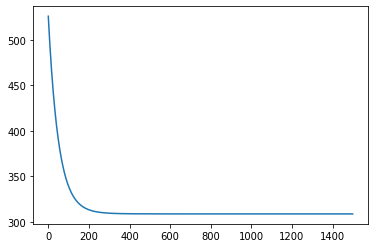

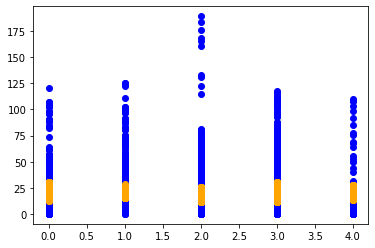

0.019855146708763316
r2:  0.019855146708763316
mse:  578.261285434852
interpolate


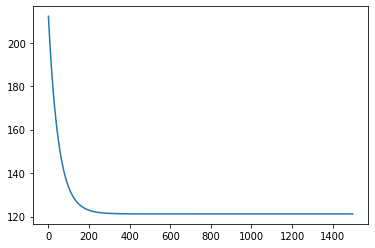

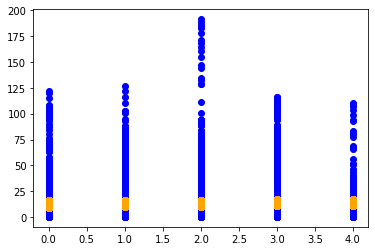

0.009266310520232968
r2:  0.009266310520232968
mse:  245.58990053005175


In [ ]:
print("normal")
multiple_linear_regression(df_features, df_target)

print("drop na")
multiple_linear_regression(df_features_na, df_target_na)

print("interpolate")
multiple_linear_regression(df_features_ip, df_target_ip)

Predictor Variables (X)

Variable (X) | Description | Grouped By
-------------------|------------------ | ------------------
testing_policy | Government policies on PCR testing for COVID-19 | No testing policy, Testing only for those who both (a) have symptoms AND (b) meet specific criteria (e.g. key workers, admitted to hospital, came into contact with a known case, returned from overseas), Testing of anyone showing COVID-19 symptoms, Open public testing (e.g “drive through” testing available to asymptomatic people)
vaccination_policy | Policies on the availability of vaccinations | No availability, Availability for ONE of following: key workers/ clinically vulnerable groups/elderly groups, Availability for TWO of following: key workers/clinically vulnerable groups/elderly groups, Availability for ALL of following: key workers/clinically vulnerable groups/elderly groups, Availability for all three plus partial additional availability (select broad groups/ages), Universal availability
facial_coverings | Government policies on the use of face coverings outside-of-the-home | No policy, Recommended, Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible, Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible, Required outside the home at all times regardless of location or presence of other people
restriction_gatherings | Government policies on restrictions on public gatherings | No restrictions, Restrictions on very large gatherings (the limit is above 1000 people), Restrictions on gatherings between 100 to 1000 people,Restrictions on gatherings between 10 to 100 people, Restrictions on gatherings of less than 10 people
stay_home_requirements | Government policies on stay-at-home requirements or household lockdowns | No measures, Recommended not to leave the house, Required to not leave the house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips, Required to not leave the house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)

Predicted Variable (y)

Variable (y) | Description | Category
-------------------|------------------ | ------------------
icu_patients_per_million   | Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people | Hospital & ICU

In [ ]:
# Extract features and targets
x_cols = ['testing_policy', 'vaccination_policy','facial_coverings', 'restriction_gatherings', 'stay_home_requirements']
y_cols = ['icu_patients_per_million']
df_task_2_na = df_task_2.copy()
df_task_2_na.dropna(inplace=True)
df_task_2_ip = df_task_2.copy()
df_task_2_ip.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

df_features, df_target = get_features_targets(df_task_2, x_cols, y_cols)
df_features_na, df_target_na = get_features_targets(df_task_2_na, x_cols, y_cols)
df_features_ip, df_target_ip = get_features_targets(df_task_2_ip, x_cols, y_cols)

## Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


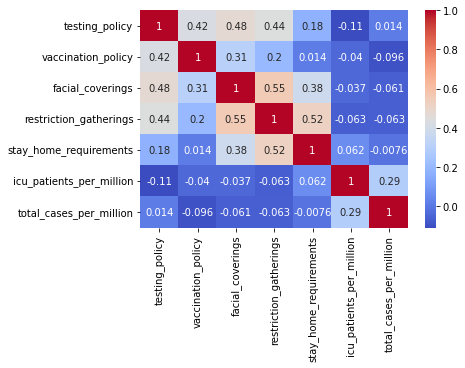

,icu_patients_per_million
testing_policy,-0.111130
vaccination_policy,-0.039576
facial_coverings,-0.037486
restriction_gatherings,-0.063391
stay_home_requirements,0.061866
icu_patients_per_million,1.000000
total_cases_per_million,0.289513


In [ ]:
# Determine the correlation between total ICU cases and all other features
corrMatrix = df_task_2.corr()
pd.set_option('display.max_rows', None)
cases_corr = pd.DataFrame(corrMatrix['icu_patients_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr

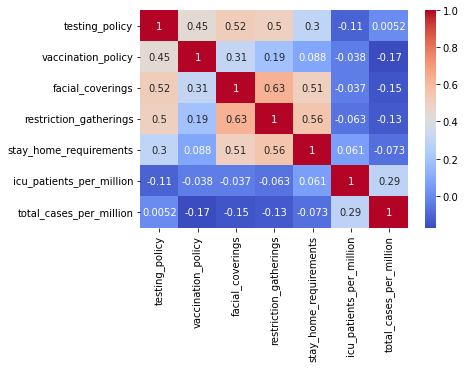

,icu_patients_per_million
testing_policy,-0.110568
vaccination_policy,-0.038365
facial_coverings,-0.037195
restriction_gatherings,-0.063136
stay_home_requirements,0.061410
icu_patients_per_million,1.000000
total_cases_per_million,0.289513


In [ ]:
# Determine the correlation between total ICU cases and all other features
corrMatrix = df_task_2_na.corr()
pd.set_option('display.max_rows', None)
cases_corr_na = pd.DataFrame(corrMatrix['icu_patients_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_na

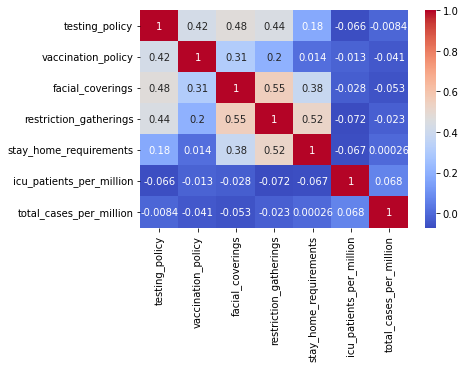

,icu_patients_per_million
testing_policy,-0.065822
vaccination_policy,-0.013453
facial_coverings,-0.027822
restriction_gatherings,-0.071797
stay_home_requirements,-0.067029
icu_patients_per_million,1.000000
total_cases_per_million,0.067573


In [ ]:
# Determine the correlation between total ICU cases and all other features
corrMatrix = df_task_2_ip.corr()
pd.set_option('display.max_rows', None)
cases_corr_ip = pd.DataFrame(corrMatrix['icu_patients_per_million'])

plt.figure()
sns.heatmap(corrMatrix, cmap="coolwarm", annot=True)
plt.show()

cases_corr_ip

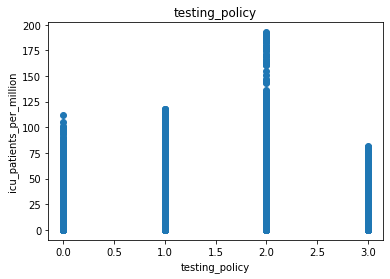

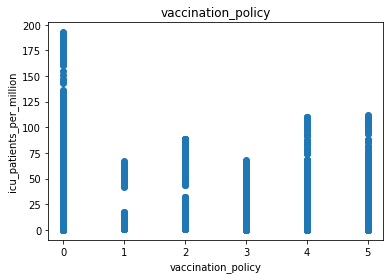

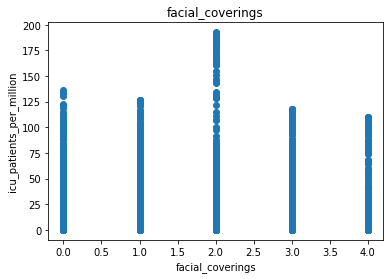

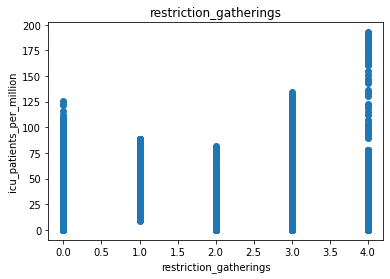

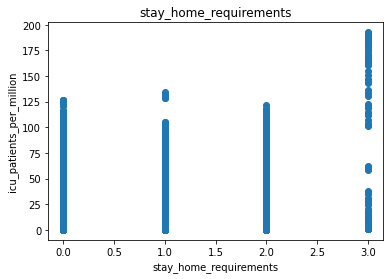

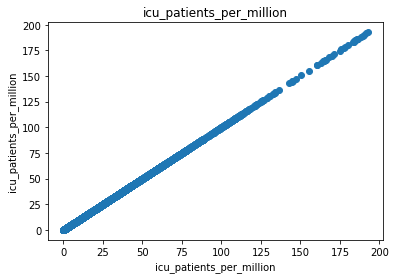

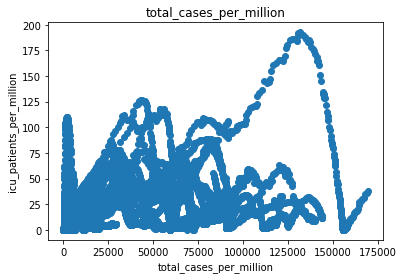

In [ ]:
# Plot predictor variables against total ICU cases
for row in cases_corr.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("icu_patients_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2[col_name], df_task_2["icu_patients_per_million"])
  plt.show()

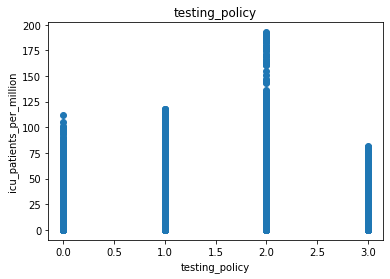

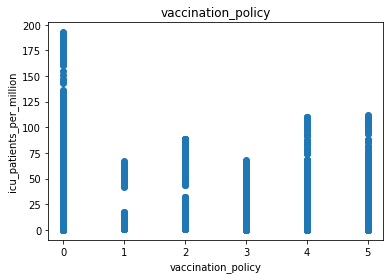

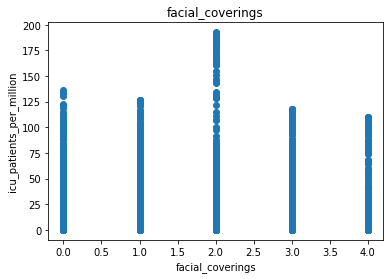

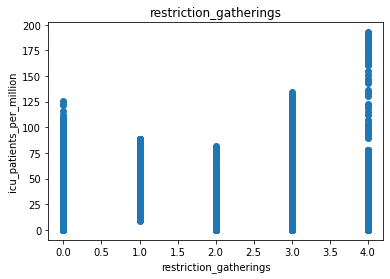

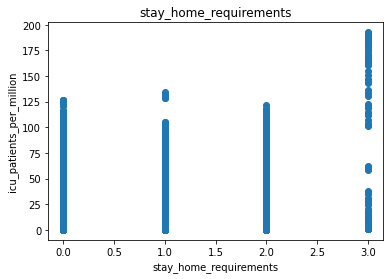

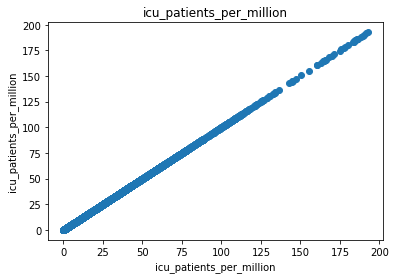

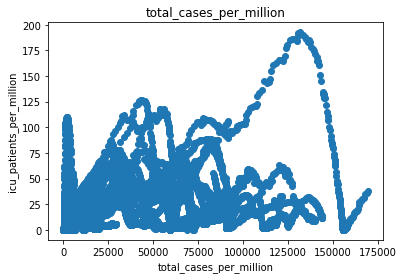

In [ ]:
# Plot predictor variables against total ICU cases
for row in cases_corr_na.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("icu_patients_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2_na[col_name], df_task_2_na["icu_patients_per_million"])
  plt.show()

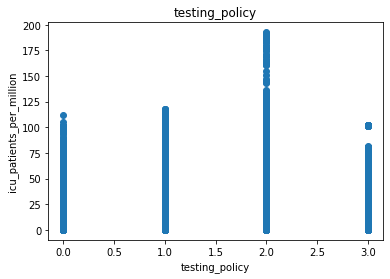

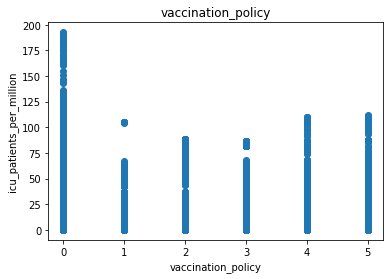

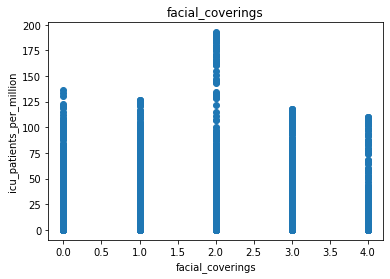

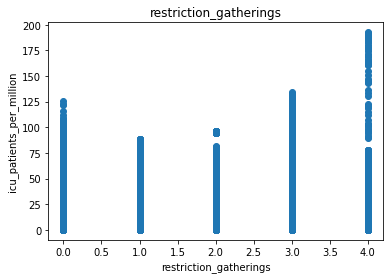

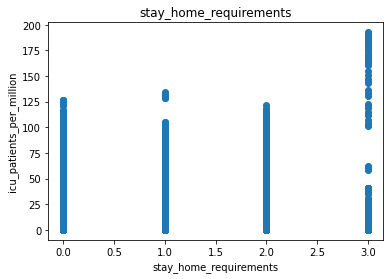

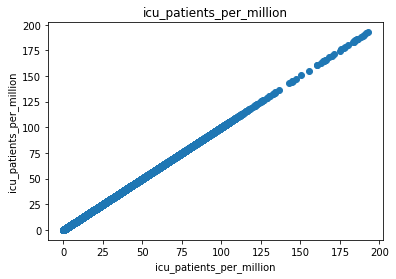

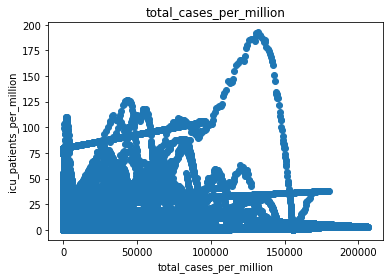

In [ ]:
# Plot predictor variables against total ICU cases
for row in cases_corr_ip.itertuples():
  col_name = row.Index
  plt.figure()
  plt.xlabel(col_name)
  plt.ylabel("icu_patients_per_million")
  plt.title(col_name)
  plt.scatter(df_task_2_ip[col_name], df_task_2_ip["icu_patients_per_million"])
  plt.show()

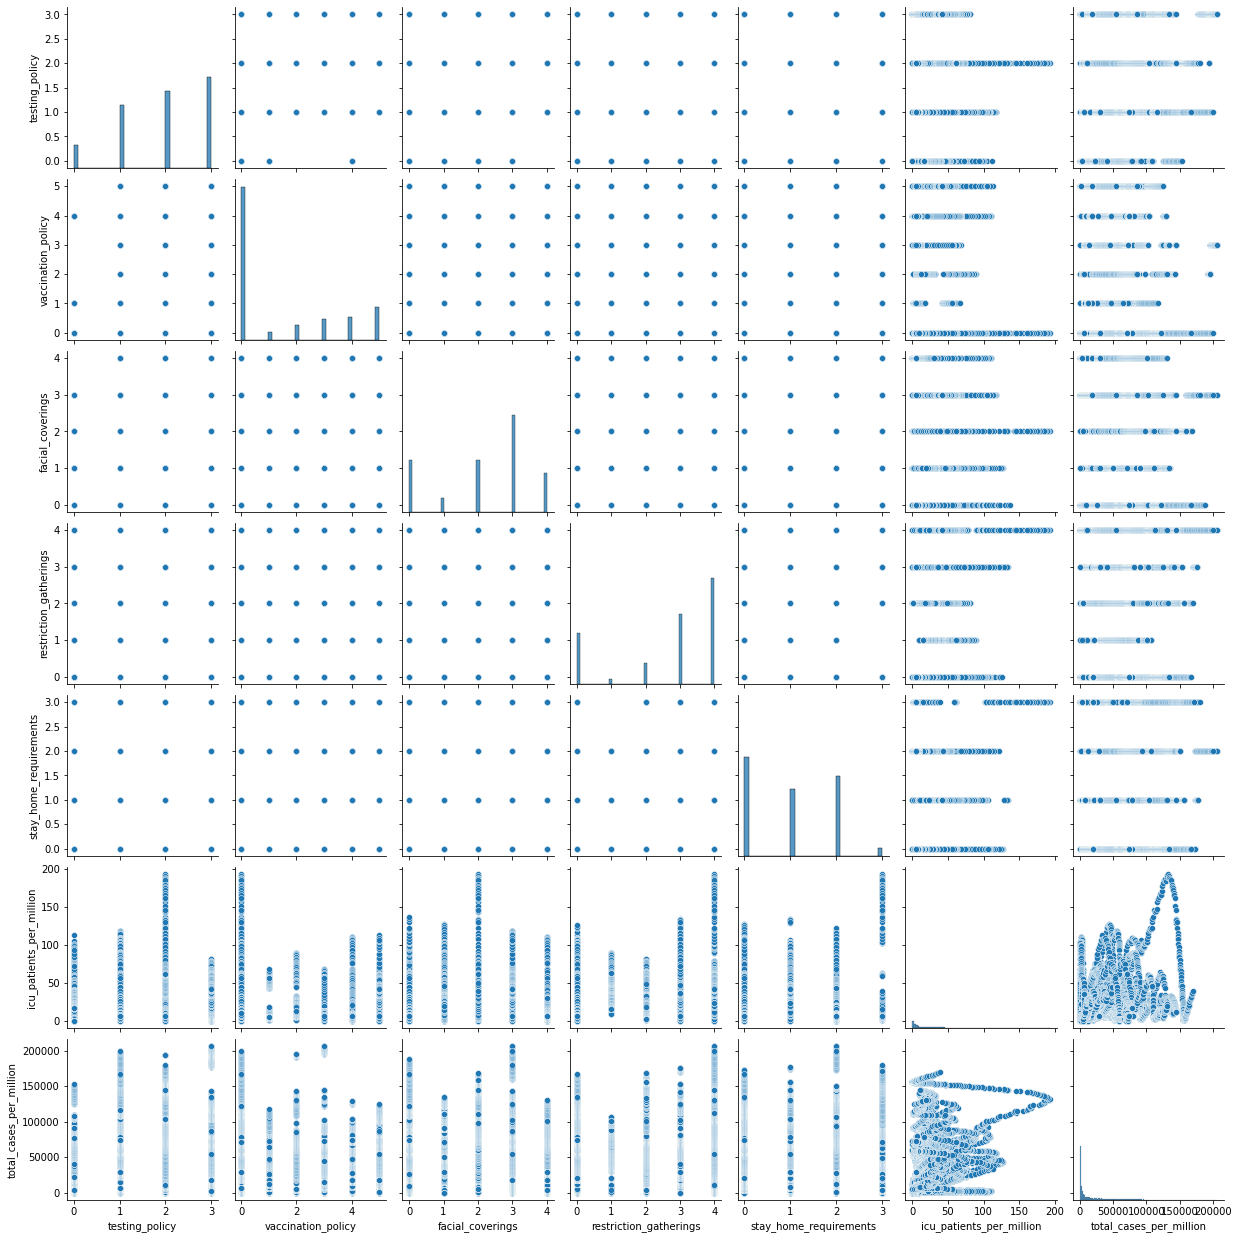

In [ ]:
sns.pairplot(data=df_task_2)

## Multiple Linear Regression (ICU Cases)
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [ ]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [ ]:
def multiple_linear_regression(df_features, df_target):
  # Split the data set into training and test
  df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=None, test_size=0.3)

  # Normalize the features using z normalization
  df_features_z = normalize_z(df_features)

  # Change the features and the target to numpy array using the prepare functions
  X = prepare_feature(df_features_z)
  target = prepare_target(df_target)

  iterations = 1500
  alpha = 0.01
  beta = np.zeros((X.shape[1], 1), dtype=float)

  # Call the gradient_descent function
  beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
  
  # call the predict() method
  pred = predict(df_features_test, beta)

  # Plotting figures for visualisation
  plt.figure()
  plt.plot(J_storage)
  plt.figure()
  plt.scatter(df_features_test["facial_coverings"], np.array(df_target_test), color='blue')
  plt.scatter(df_features_test["facial_coverings"], pred, color='orange')
  plt.show()

  # Calculate r^2
  # change target test set to a numpy array
  target = df_target_test.to_numpy()
  # Calculate r2 score by calling a function
  r2 = r2_score(target, pred)
  print("r2: ", r2)

  # Calculate MSE
  mse = mean_squared_error(target, pred)
  print("mse: ", mse)

normal


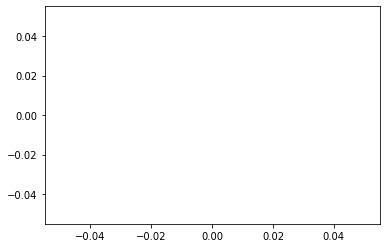

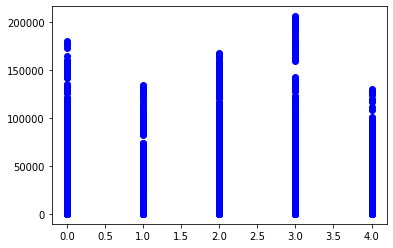

nan
r2:  nan
mse:  nan
drop na


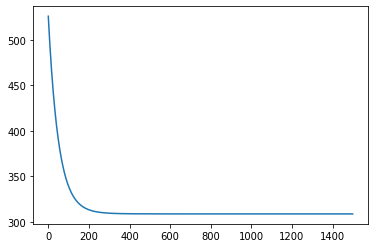

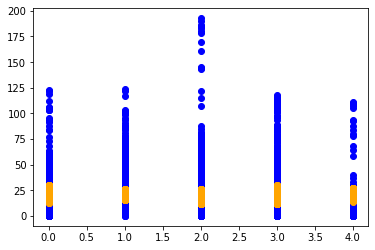

0.036261521694782806
r2:  0.036261521694782806
mse:  623.8064610451091
interpolate


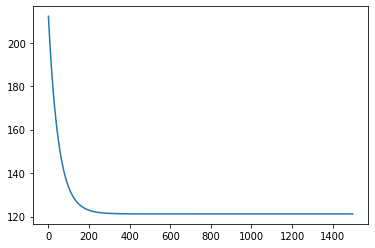

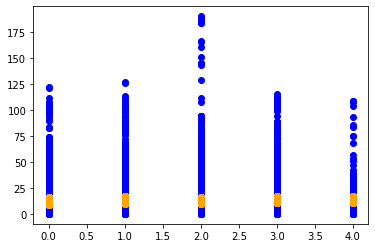

0.0077599615977395064
r2:  0.0077599615977395064
mse:  245.8425413205918


In [ ]:
print("normal")
multiple_linear_regression(df_features, df_target)

print("drop na")
multiple_linear_regression(df_features_na, df_target_na)

print("interpolate")
multiple_linear_regression(df_features_ip, df_target_ip)

Predictor Variables (X)

Variable (X) | Description | Grouped By
-------------------|------------------ | ------------------
testing_policy | Government policies on PCR testing for COVID-19 | No testing policy, Testing only for those who both (a) have symptoms AND (b) meet specific criteria (e.g. key workers, admitted to hospital, came into contact with a known case, returned from overseas), Testing of anyone showing COVID-19 symptoms, Open public testing (e.g “drive through” testing available to asymptomatic people)
vaccination_policy | Policies on the availability of vaccinations | No availability, Availability for ONE of following: key workers/ clinically vulnerable groups/elderly groups, Availability for TWO of following: key workers/clinically vulnerable groups/elderly groups, Availability for ALL of following: key workers/clinically vulnerable groups/elderly groups, Availability for all three plus partial additional availability (select broad groups/ages), Universal availability
facial_coverings | Government policies on the use of face coverings outside-of-the-home | No policy, Recommended, Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible, Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible, Required outside the home at all times regardless of location or presence of other people
restriction_gatherings | Government policies on restrictions on public gatherings | No restrictions, Restrictions on very large gatherings (the limit is above 1000 people), Restrictions on gatherings between 100 to 1000 people,Restrictions on gatherings between 10 to 100 people, Restrictions on gatherings of less than 10 people

Predicted Variable (y)

Variable (y) | Description | Category
-------------------|------------------ | ------------------
stay_home_requirements | Government policies on stay-at-home requirements or household lockdowns | No measures, Recommended not to leave the house, Required to not leave the house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips, Required to not leave the house with minimal exceptions (e.g. allowed to leave only once every few days, or only one person can leave at a time, etc.)

In [ ]:
# Extract features and targets
x_cols = ['testing_policy', 'vaccination_policy','facial_coverings', 'restriction_gatherings']
y_cols = ['stay_home_requirements']
df_task_2_na = df_task_2.copy()
df_task_2_na.dropna(inplace=True)
df_task_2_ip = df_task_2.copy()
df_task_2_ip.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

df_features, df_target = get_features_targets(df_task_2, x_cols, y_cols)
df_features_na, df_target_na = get_features_targets(df_task_2_na, x_cols, y_cols)
df_features_ip, df_target_ip = get_features_targets(df_task_2_ip, x_cols, y_cols)

From: https://towardsdatascience.com/master-machine-learning-multiple-linear-regression-from-scratch-with-python-ac716a9b78a4


In [ ]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate # alpha
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights (beta) and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

# Preprocessing (Can delete later)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


In [ ]:
df_vac = pd.read_csv("t3-2d-ddw/task-2/covid-vaccination-policy.csv")
df_vac.name = "df_vac"
df_test = pd.read_csv("t3-2d-ddw/task-2/covid-19-testing-policy.csv")
df_test.name = "df_test"
df_face = pd.read_csv("t3-2d-ddw/task-2/face-covering-policies-covid.csv")
df_face.name = "df_face"
df_public = pd.read_csv("t3-2d-ddw/task-2/public-gathering-rules-covid.csv")
df_public.name = "df_public"
df_stay = pd.read_csv("t3-2d-ddw/task-2/stay-at-home-covid.csv")
df_stay.name = "df_stay"

In [ ]:
dataframes = [df_vac, df_test, df_face, df_public, df_stay]

In [ ]:
pd.merge(df_vac, df_test, "outer").to_csv("df_vac_test.csv")
pd.merge(df_test, df_face, "outer").to_csv("df_test_face.csv")
pd.merge(df_face, df_public, "outer").to_csv("df_face_public.csv")
pd.merge(df_public, df_stay, "outer").to_csv("df_public_stay.csv")
pd.merge(df_stay, df_vac, "outer").to_csv("df_stay_vac.csv")

In [ ]:
df_vac_test = pd.merge(df_vac, df_test, "outer")
df_test_face = pd.merge(df_test, df_face, "outer")
df_face_public = pd.merge(df_face, df_public, "outer")
df_public_stay = pd.merge(df_public, df_stay, "outer")
df_stay_vac = pd.merge(df_stay, df_vac, "outer")

In [ ]:
def merge_and_save(dataframes):
  for idx in range(len(dataframes)):
    if idx == 4:
      df_merged = pd.merge(dataframes[idx], dataframes[0], "outer")
      missing_indices = list(np.where(pd.isnull(df_merged))[0])
      filename = "missing_" + dataframes[idx].name + "_" + dataframes[0].name + ".csv"
      df_merged.iloc[missing_indices, :].to_csv(filename)  
    
    df_merged = pd.merge(dataframes[idx], dataframes[idx+1], "outer")
    missing_indices = list(np.where(pd.isnull(df_merged))[0])
    filename = "missing_" + dataframes[idx].name + "_" + dataframes[idx+1].name + ".csv"
    df_merged.iloc[missing_indices, :].to_csv(filename)

In [ ]:
missing_indices = np.where(pd.isnull(df_vac_test))[0]
missing_indices = missing_indices.tolist()

In [ ]:
pd.to_csv(df_vac_test.iloc[missing_indices, :])

In [ ]:
from functools import reduce
df_merged = reduce(lambda left,right: pd.merge(left, right, how='outer'), dataframes)
# df_merged = pd.concat(data_frames, join='outer')
pd.to_csv(df_vac_test.iloc[missing_indices, :])

(124608, 8)
(124608, 8)


In [ ]:
np.where(pd.isnull(df_merged))

(array([     0,      0,      0, ..., 620994, 620994, 620994]),
 array([4, 5, 6, ..., 4, 5, 6]))

In [ ]:
missing_indices = np.where(pd.isnull(df_merged))[0]
missing_indices = missing_indices.tolist()

In [ ]:
df_missing = df_merged.loc[missing_indices, :]

In [ ]:
df_missing.to_csv("missing_df_all.csv")

In [ ]:
unique_countries = list(df_missing['Entity'].unique())
unique_codes = list(df_missing['Code'].unique())
print(unique_countries, unique_codes)

['Afghanistan', 'Angola', 'Argentina', 'Aruba', 'Bahrain', 'Bolivia', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Comoros', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Dominica', 'Estonia', 'Fiji', 'Gambia', 'Ghana', 'Guinea', 'Honduras', 'Hong Kong', 'Kuwait', 'Lesotho', 'Madagascar', 'Moldova', 'Myanmar', 'Namibia', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Senegal', 'Slovakia', 'Slovenia', 'South Sudan', 'Sri Lanka', 'Sudan', 'Syria', 'Taiwan', 'Thailand', 'Timor', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United States Virgin Islands', 'Chile', 'Iraq', 'Jordan', 'Kosovo', 'Libya', 'Mali', 'Palestine', 'Suriname', 'Tajikistan', 'Togo', 'Tonga', 'Turkey', 'Uganda', 'Yemen', 'Seychelles', 'Rwanda'] ['AFG', 'AGO', 'ARG', 'ABW', 'BHR', 'BOL', 'BFA', 'CMR', 'CAF', 'COM', 'CIV', 'COD', 'DMA', 'EST', 'FJI', 'GMB', 'GHA', 'GIN', 'HND', 'HKG', 'KWT', 'LSO', 'MDG', 'MDA'

In [ ]:
count_blanks = {}
for code in unique_codes:
  count_blanks[code] = df_missing.loc[df_missing['Code'] == code,'Code'].agg(['nunique','count','size'])

print(count_blanks)

{'AFG': nunique    1
count      2
size       2
Name: Code, dtype: int64, 'AGO': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'ARG': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'ABW': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'BHR': nunique     1
count      14
size       14
Name: Code, dtype: int64, 'BOL': nunique     1
count      66
size       66
Name: Code, dtype: int64, 'BFA': nunique     1
count      15
size       15
Name: Code, dtype: int64, 'CMR': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'CAF': nunique     1
count      22
size       22
Name: Code, dtype: int64, 'COM': nunique       1
count      1082
size       1082
Name: Code, dtype: int64, 'CIV': nunique    1
count      9
size       9
Name: Code, dtype: int64, 'COD': nunique     1
count      14
size       14
Name: Code, dtype: int64, 'DMA': nunique     1
count      12
size       12
Name: Code, dtype: int64, 'EST': nunique     1
count      15
s